**Group 3 - Machine Learning (LC09)**
- Jocelyn Verna Siswanto - 2502008006
- Laurentia Alyssa Castilani - 2502049006
- Natasha Hartanti Winata - 2502039176
- Nathania Christy Nugraha - 2502035026

## **LOAD LIBRARIES & DATASET**

### Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report  
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier, AdaBoostClassifier, RandomForestClassifier, BaggingClassifier
%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

### Dataset

In [2]:
salarydf = pd.read_csv("all.csv", sep='|')

In [3]:
salarydf.head(5)

,id,job_title,location,salary_currency,career_level,experience_level,education_level,employment_type,job_function,job_benefits,company_process_time,company_size,company_industry,job_description,salary
0,1,Facility Maintenance & Smart Warehouse Manager,Bandung,IDR,Manajer/Asisten Manajer,5 tahun,"Sertifikat Professional, D3 (Diploma), D4 (Dip...",Penuh Waktu,"Manufaktur,Pemeliharaan",NaN,NaN,NaN,NaN,Deskripsi PekerjaanRequirements :D3/SI from re...,NaN
1,2,Procurement Department Head,Jakarta Raya,IDR,Manajer/Asisten Manajer,5 tahun,"Sarjana (S1), Diploma Pascasarjana, Gelar Prof...",Penuh Waktu,"Manufaktur,Pembelian/Manajemen Material",NaN,25 days,51 - 200 pekerja,Manajemen/Konsulting HR,Job Role: 1. Responsible for material availabi...,NaN
2,3,SALES ADMIN,Jakarta Barat,IDR,Supervisor/Koordinator,4 tahun,Sarjana (S1),Penuh Waktu,"Penjualan / Pemasaran,Penjualan Ritel","Waktu regular, Senin - Jumat;Bisnis (contoh: K...",30 days,51 - 200 pekerja,Umum & Grosir,Internal Sales & AdminJob Description :We are ...,NaN
3,4,City Operation Lead Shopee Express (Cirebon),Cirebon,IDR,Supervisor/Koordinator,5 tahun,"Sarjana (S1), Diploma Pascasarjana, Gelar Prof...",Penuh Waktu,"Pelayanan,Logistik/Rantai Pasokan","Tip;Waktu regular, Senin - Jumat;Kasual (conto...",21 days,2001 - 5000 pekerja,Retail/Merchandise,Job Description:Responsible for HSE implementa...,NaN
4,5,Japanese Interpreter,Bekasi,IDR,Pegawai (non-manajemen & non-supervisor),2 tahun,"Sertifikat Professional, D3 (Diploma), D4 (Dip...",Penuh Waktu,"Lainnya,Jurnalis/Editor",NaN,23 days,201 - 500 pekerja,Manajemen/Konsulting HR,Overview: Our clients is manufacture for autom...,NaN


In [4]:
salarydf.tail(5)

,id,job_title,location,salary_currency,career_level,experience_level,education_level,employment_type,job_function,job_benefits,company_process_time,company_size,company_industry,job_description,salary
34741,34742,Staff Accounting,Bekasi,IDR,Pegawai (non-manajemen & non-supervisor),2 tahun,Sarjana (S1),Kontrak,"Akuntansi / Keuangan,Akuntansi Umum / Pembiayaan","Waktu regular, Senin - Jumat;Bisnis (contoh: K...",NaN,1- 50 pekerja,Manufaktur/Produksi,Candidate must possess at least Bachelor's Deg...,4500000.0
34742,34743,Frontend Developer,Jakarta Pusat,IDR,Pegawai (non-manajemen & non-supervisor),2 tahun,Sarjana (S1),Penuh Waktu,"Komputer/Teknologi Informasi,IT-Perangkat Lunak","Tip;Asuransi kesehatan;Waktu regular, Senin - ...",24 days,501 - 1000 pekerja,Perbankan/Pelayanan Keuangan,job description :1.Participate in the daily de...,11500000.0
34743,34744,Account Manager,Jakarta Selatan,IDR,Pegawai (non-manajemen & non-supervisor),2 tahun,Sarjana (S1),Penuh Waktu,"Penjualan / Pemasaran,Penjualan - Korporasi","Asuransi kesehatan;Waktu regular, Senin - Juma...",27 days,1- 50 pekerja,Komputer/Teknik Informatika (Perangkat Keras),Tugas & Tanggung Jawab:Melakukan program pemas...,6250000.0
34744,34745,Sales,Palembang,IDR,Lulusan baru/Pengalaman kerja kurang dari 1 tahun,1 tahun,"SMA, SMU/SMK/STM",Penuh Waktu,"Penjualan / Pemasaran,Penjualan Ritel",Asuransi kesehatan;Jam Bekerja yang Panjang;Bi...,29 days,51 - 200 pekerja,Umum & Grosir,Melakukan proses penjualan produk bahan bangun...,3387500.0
34745,34746,Credit Marketing Officer (CMO) - Tangerang & C...,Tangerang,IDR,Pegawai (non-manajemen & non-supervisor),1 tahun,"SMA, SMU/SMK/STM, Sertifikat Professional, D3 ...",Kontrak,"Akuntansi / Keuangan,Perbankan / Jasa Finansial",Tip;Asuransi kesehatan;Parkir;Bisnis (contoh: ...,19 days,201 - 500 pekerja,Perbankan/Pelayanan Keuangan,CMO Motor BaruMelakukan penjualan produk pembi...,5200000.0


__Meta Data__ :
- id: the id of the data (unique).
- job_title = name of the job.
- location = company location.
- salary_currency = the currency used in salary.
- career_level = career level such as manager, CEO, etc.
- experience_level = experience required for applicants.
- education_level = education required for applicants.
- employment_type = full-time, part-time, or internship.
- job_function = category of the job.
- job_benefits = benefit given by the company.
- companyprocesstime = average time the company will give response to the applicants.
- company_size = number of employee in the company.
- company_industry = the company's sector of service.
- job_description = description of the job.
- salary = salary offered by the company per month. (per March 2022)

__Explanation__:
- Problem Statement : Many people want to find work based on the salary range. In this dataset, the class for each records are classified into 3 class 'Rendah' (low income, below or equals to province UMP), 'Sedang' (average income, more than UMP and below or equals to 2 times of province UMP), AND 'Tinggi' (high income, above 2 times of province UMP) based on each province.
- Goals: Predict a person's salary class based on the field of work (career level and job function), and work location. 
- Target output: Predict salary level class

## **EDA**

### About Dataset


In [5]:
salarydf.shape

(34746, 15)

__Explanation__ :
- The dataset consists of 15 variables with 34746 records.

In [6]:
salarydf.columns

Index(['id', 'job_title', 'location', 'salary_currency', 'career_level',
       'experience_level', 'education_level', 'employment_type',
       'job_function', 'job_benefits', 'company_process_time', 'company_size',
       'company_industry', 'job_description', 'salary'],
      dtype='object')

In [7]:
salarydf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34746 entries, 0 to 34745
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    34746 non-null  int64  
 1   job_title             34746 non-null  object 
 2   location              34746 non-null  object 
 3   salary_currency       34742 non-null  object 
 4   career_level          34746 non-null  object 
 5   experience_level      30205 non-null  object 
 6   education_level       34746 non-null  object 
 7   employment_type       33402 non-null  object 
 8   job_function          34746 non-null  object 
 9   job_benefits          27330 non-null  object 
 10  company_process_time  24555 non-null  object 
 11  company_size          29103 non-null  object 
 12  company_industry      33132 non-null  object 
 13  job_description       34745 non-null  object 
 14  salary                9352 non-null   float64
dtypes: float64(1), int6

__Explanation__:
- The dataset consists of 15 variables:
  - `id` has the type of integer.
  - `job_title`, `location`, `salary_currency`, `career_level`, `experience_level`, `education_level`, `employment_type`, `job_function`, `job_benefit`, `company_process_time`, `company_size`, `company_industry`, `job_description` has the type of object.
  - `salary` has the type of float. 

- Some of the variables got missing values, judging from the Non-null count.

### Barplots (Target Variable VS Independent Variable)

#### Salary & Career Level

<AxesSubplot:xlabel='salary', ylabel='career_level'>

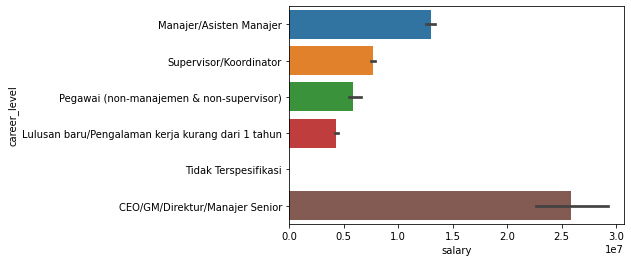

In [8]:
sns.barplot(salarydf.salary, salarydf.career_level)

__Explanation:__

From the visualization above, the CEO, director, and senior manager receive the highest amount of salary than any other career level. On the other hand, fresh graduates and workers with less than 1 year of working experience have the lowest salary amount. This actually makes sense because CEOs, directors, and senior managers are leaders with great responsibilities, but fresh graduates and workers with less than 1 year of job experience does not have any achievement in their career yet, so a company will prefer to give them low salary as their performance in their occupation are still unknown.

#### Salary & Experience Level

<AxesSubplot:xlabel='salary', ylabel='experience_level'>

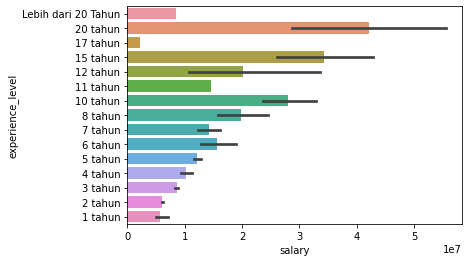

In [9]:
sns.barplot(salarydf.salary, salarydf.experience_level,
            order= ['Lebih dari 20 Tahun','20 tahun','17 tahun','15 tahun','12 tahun','11 tahun','10 tahun','8 tahun',
                    '7 tahun','6 tahun','5 tahun','4 tahun','3 tahun','2 tahun','1 tahun'])

__Explanation:__

Overall, there are correlations between the amount of salary and experience level. From the visualization above, the amount of salary keeps decreasing as the experience level decreased. Except for workers with more than 20 years of job experience, which surprisingly have way lower amount of salary than workers with 20 years experience.

#### Salary & Employment Type

<AxesSubplot:xlabel='salary', ylabel='employment_type'>

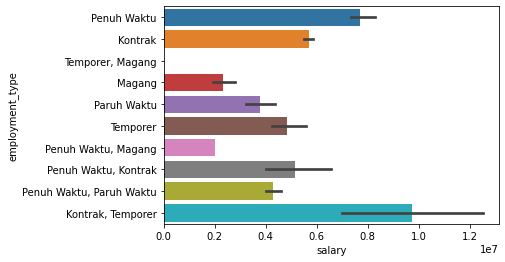

In [10]:
sns.barplot(salarydf.salary, salarydf.employment_type)

In [11]:
salarydf.groupby(['employment_type'])['salary'].mean()

employment_type
Kontrak                     5.685170e+06
Kontrak, Temporer           9.750000e+06
Magang                      2.337429e+06
Paruh Waktu                 3.755232e+06
Penuh Waktu                 7.686298e+06
Penuh Waktu, Kontrak        5.130429e+06
Penuh Waktu, Magang         2.000000e+06
Penuh Waktu, Paruh Waktu    4.300000e+06
Temporer                    4.850542e+06
Temporer, Magang                     NaN
Name: salary, dtype: float64

__Explanation:__

Based on the table and the barplot above, the full time interns achieve the lowest salary, which probably makes sense because they usually don't have any job experience and have not graduated from university yet. However, contract workers with temporary jobs suprisingly achieve the highest salary, even higher than full time employees.

#### Salary & Company Process Time

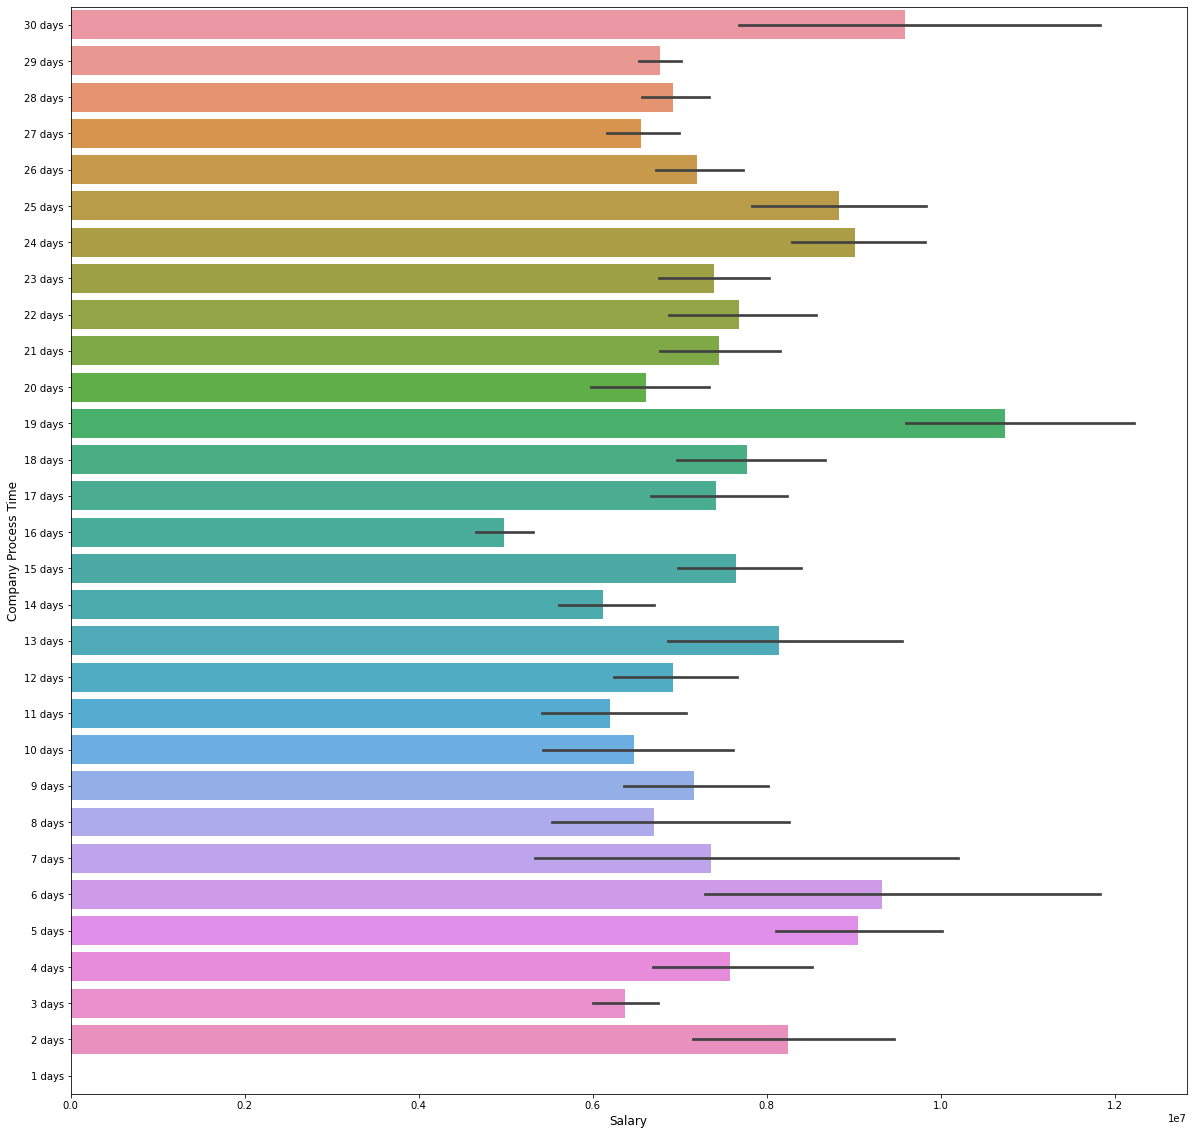

In [12]:
sns.barplot(salarydf.salary, salarydf.company_process_time,
            order= ['30 days','29 days','28 days','27 days','26 days','25 days','24 days','23 days','22 days','21 days',
                    '20 days','19 days','18 days','17 days','16 days','15 days','14 days','13 days','12 days','11 days',
                    '10 days','9 days','8 days','7 days','6 days','5 days','4 days','3 days','2 days','1 days'])
plt.gcf().set_size_inches(20,20)
plt.xlabel('Salary', fontsize=12);
plt.ylabel('Company Process Time', fontsize=12);
plt.tick_params(axis='both', which='major', labelsize=10)

__Explanation:__

It seems like there are no relation between the amount of salary vs how long the companies give responds to applicants. Because companies that respond in 19 days on average give the highest salary, but companies that respond in 16 days on average give the lowest salary.

#### Salary & Company Size

<AxesSubplot:xlabel='salary', ylabel='company_size'>

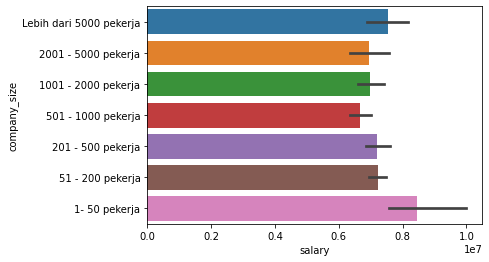

In [13]:
sns.barplot(salarydf.salary, salarydf.company_size,
            order= ['Lebih dari 5000 pekerja','2001 - 5000 pekerja','1001 - 2000 pekerja','501 - 1000 pekerja',
                    '201 - 500 pekerja','51 - 200 pekerja','1- 50 pekerja'])

__Explanation:__

From the barplot above, surprisingly the startups (companies that only have 1-50 workers) give the highest salary, and the medium-sized companies (companies that have 501-1000 workers) give the lowest salary based on our dataset. So it seems like there aren't any correlation between the amount of salary vs company size

#### Salary & Company Industry

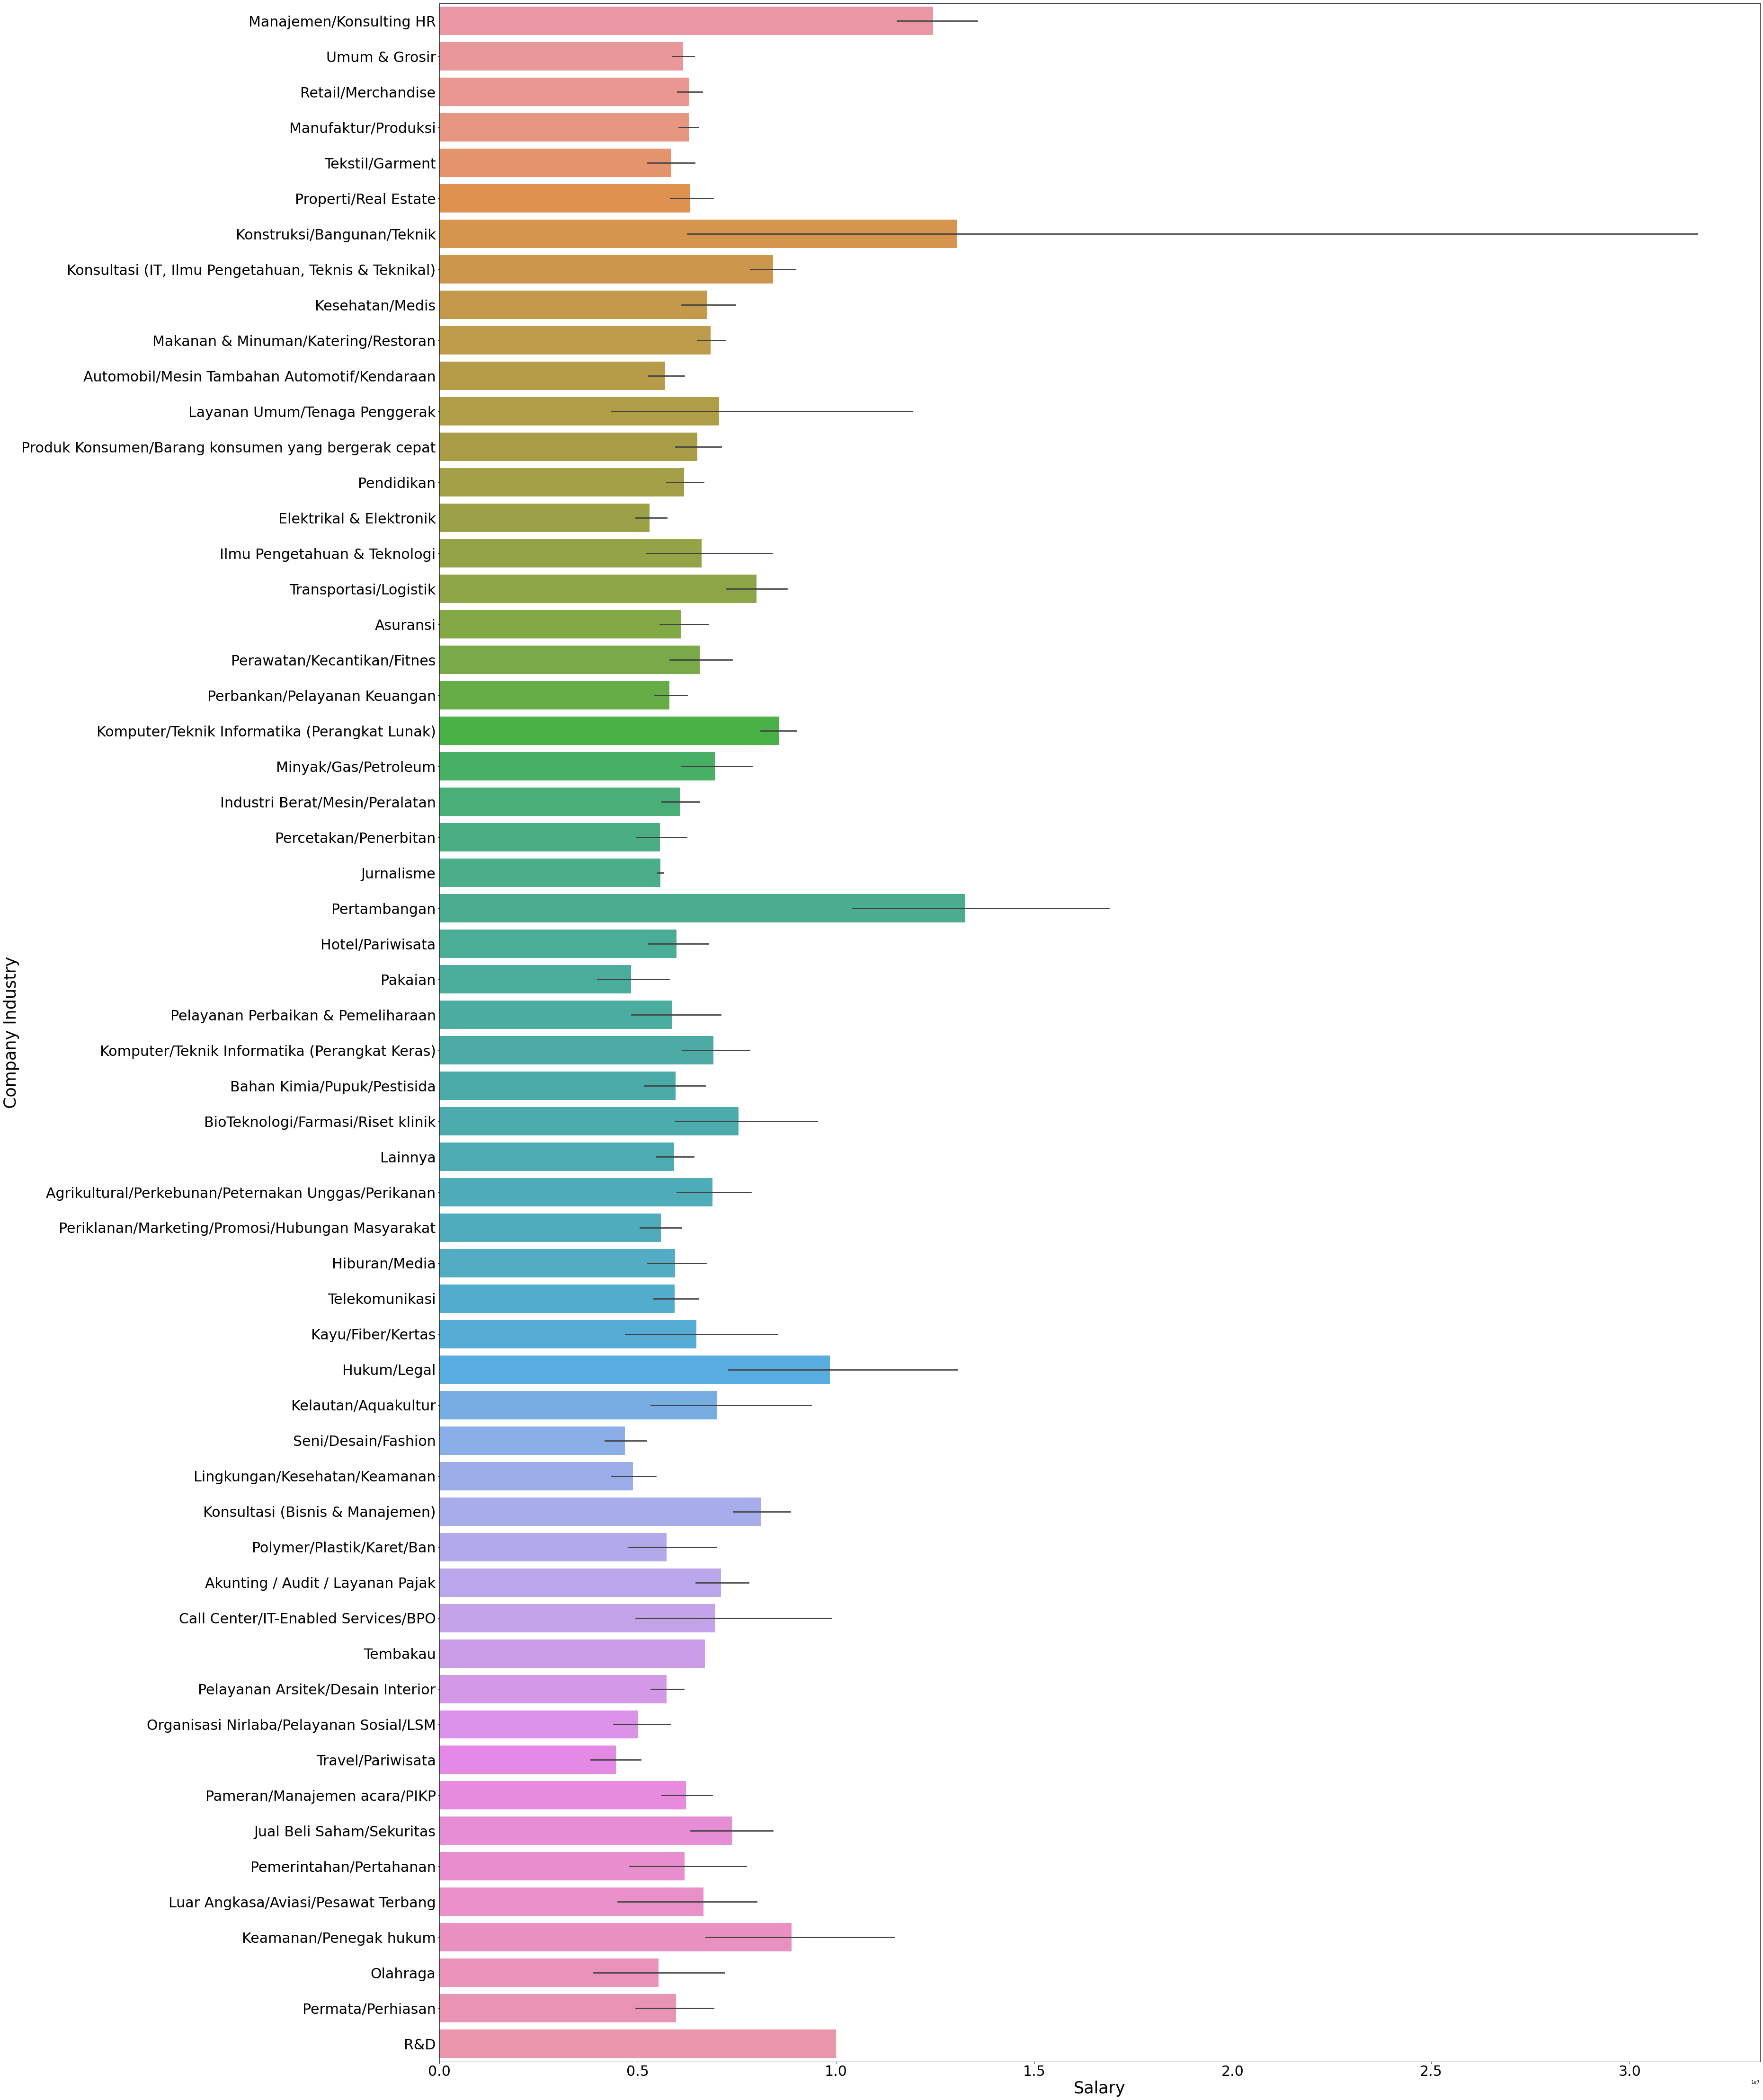

In [14]:
sns.barplot(salarydf.salary, salarydf.company_industry)
plt.gcf().set_size_inches(50,80)
plt.xlabel('Salary', fontsize=35);
plt.ylabel('Company Industry', fontsize=35);
plt.tick_params(axis='both', which='major', labelsize=30)

__Explanation:__

From the barplot, we can see that construction building or engineering industries, as well as mining industries tend to give the highest salary. On the other hand, tourism industry gives the least salary.

#### Initial Conclusion

In [15]:
salarydf['salary_currency'].value_counts()

IDR    34731
USD       11
Name: salary_currency, dtype: int64

__Explanation:__

***From these 6 visualizations, there are some cases that does not make any sense, like how the temporary workers get the highest salary, how start ups can give way higher amount of salary than medium and big companies, or how workers with more than 20 years of job experience get way lower salary than workers with 20 years experience. This is probably because there are 2 currency, so the salary values are inconsistent. Therefore, we need to perform Data Preparation first, before we explore our dataset deeper.***

### Check categorical variables related to job titles

In [16]:
job_title_count = pd.DataFrame(salarydf['job_title'].unique())
job_title_count

,0
0,Facility Maintenance & Smart Warehouse Manager
1,Procurement Department Head
2,SALES ADMIN
3,City Operation Lead Shopee Express (Cirebon)
4,Japanese Interpreter
...,...
20627,SOCIAL MEDIA STAFF
20628,Head Of Subdivision (English Speaking) Bandung
20629,Receiving Staff
20630,Operator CNC Milling


In [17]:
salarydf['job_title'].unique()

array(['Facility Maintenance & Smart Warehouse Manager',
       'Procurement Department Head', 'SALES ADMIN', ...,
       'Receiving Staff', 'Operator CNC Milling',
       'Credit Marketing Officer (CMO) - Tangerang & Cikupa'],
      dtype=object)

In [18]:
salarydf['career_level'].unique()

array(['Manajer/Asisten Manajer', 'Supervisor/Koordinator',
       'Pegawai (non-manajemen & non-supervisor)',
       'Lulusan baru/Pengalaman kerja kurang dari 1 tahun',
       'Tidak Terspesifikasi', 'CEO/GM/Direktur/Manajer Senior'],
      dtype=object)

In [19]:
salarydf['job_function'].unique()

array(['Manufaktur,Pemeliharaan',
       'Manufaktur,Pembelian/Manajemen Material',
       'Penjualan / Pemasaran,Penjualan Ritel',
       'Pelayanan,Logistik/Rantai Pasokan', 'Lainnya,Jurnalis/Editor',
       'Manufaktur,Manufaktur', 'Penjualan / Pemasaran,E-commerce',
       'Akuntansi / Keuangan,Akuntansi Umum / Pembiayaan',
       'Teknik,Teknik Elektro', 'Akuntansi / Keuangan,Audit & Pajak',
       'Komputer/Teknologi Informasi,IT-Perangkat Lunak',
       'Komputer/Teknologi Informasi,IT-Admin Jaringan/Sistem/Database',
       'Penjualan / Pemasaran,Pemasaran/Pengembangan Bisnis',
       'Sains,Sains & Teknologi',
       'Hotel/Restoran,Makanan/Minuman/Pelayanan Restoran',
       'Bangunan/Konstruksi,Properti/Real Estate',
       'Sumber Daya Manusia/Personalia,Sumber Daya Manusia / HR',
       'Penjualan / Pemasaran,Penjualan - Korporasi',
       'Pendidikan/Pelatihan,Pelatihan & Pengembangan',
       'Penjualan / Pemasaran,Penjualan - Jasa Keuangan',
       'Teknik,Mekanikal', '

In [20]:
job_func_count = pd.DataFrame(salarydf['job_function'].unique())
job_func_count

,0
0,"Manufaktur,Pemeliharaan"
1,"Manufaktur,Pembelian/Manajemen Material"
2,"Penjualan / Pemasaran,Penjualan Ritel"
3,"Pelayanan,Logistik/Rantai Pasokan"
4,"Lainnya,Jurnalis/Editor"
...,...
63,"Teknik,Minyak/Gas"
64,"Sains,Kimia"
65,"Manufaktur,Kontrol Proses"
66,"Seni/Media/Komunikasi,Hiburan"


__Explanation__:
- The outputs produced by the codes above are needed for us to decide how many catogories in respective variables. If the variable's categories is too many, we can conclude in the mean time that probably that variable won't have a high correlation with our target variable.
- From the output above we can say that:
  - in `job_title` there are 5899 categories (we only have around 9000 data, so we can say that this variable's correlation with our target variable won't be so high)
  - in `career_level` there are 5 categories.
  - in `job_function` there are 67 categories.
  - `career_level` and `job_function` would have a better correlation with our target variable than `job_title` since they have less categories in them.

## **DATA PREPARATION : DATA CLEANING**

In [21]:
salarydf = salarydf[salarydf['salary'].notna()]

In [22]:
salarydf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9352 entries, 5 to 34745
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9352 non-null   int64  
 1   job_title             9352 non-null   object 
 2   location              9352 non-null   object 
 3   salary_currency       9352 non-null   object 
 4   career_level          9352 non-null   object 
 5   experience_level      8570 non-null   object 
 6   education_level       9352 non-null   object 
 7   employment_type       9352 non-null   object 
 8   job_function          9352 non-null   object 
 9   job_benefits          7070 non-null   object 
 10  company_process_time  6157 non-null   object 
 11  company_size          7928 non-null   object 
 12  company_industry      9060 non-null   object 
 13  job_description       9352 non-null   object 
 14  salary                9352 non-null   float64
dtypes: float64(1), int64

__Explanation__:

Since our target variable is `salary`, we are going to remove all records that have missing salary value. Although the number of records with missing salary value is more than 50% of our original dataset, this remaining number of records is still enough for classifiers to generate a model.

### Remove Outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x1b3658a3160>,
 'caps': [<matplotlib.lines.Line2D at 0x1b3658a36a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b365893e50>],
 'medians': [<matplotlib.lines.Line2D at 0x1b3658a3b80>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b3658a3e50>],
 'means': []}

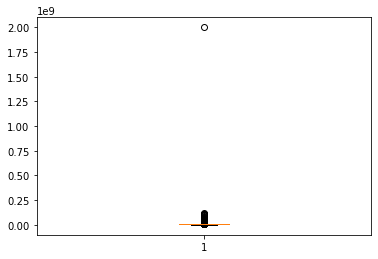

In [23]:
plt.boxplot(salarydf['salary'])

In [24]:
salarydf = salarydf[salarydf['salary'] < max(salarydf['salary'])]

__EXPLANATION__:

Because there is one outlier in our dataset, which is the maximum value of the `salary` variable, we have decided to remove the outliers by excluding record with maximum amount of salary.

### Imputation

__Explanation__:

In this step, we will plug in the missing values ​​in the independent variables (`experience_level`, `job_benefit`, `company_process_time`, `company_size`, `company_industry`) **with mode values**, due to its data type in **categorical form**. We can't exclude those records because there will be too much to remove. It will reduce the size of our dataset and affect the modeling process.

#### 1. Imputation Experience Level

In [25]:
salarydf['experience_level'].unique()

array([nan, '3 tahun', '1 tahun', '2 tahun', '5 tahun', '4 tahun',
       '10 tahun', '6 tahun', '8 tahun', '7 tahun', '15 tahun',
       '12 tahun', '11 tahun', '17 tahun', '20 tahun',
       'Lebih dari 20 Tahun'], dtype=object)

In [26]:
salarydf['experience_level'].isna().sum()

782

__Explanation__:

We can see in the `experience_level` variable, there are 782 missing values.

In [27]:
exp =  salarydf['experience_level'].value_counts()
exp

1 tahun                3082
2 tahun                2537
3 tahun                1638
5 tahun                 898
4 tahun                 180
10 tahun                 90
7 tahun                  52
8 tahun                  41
6 tahun                  24
15 tahun                 11
12 tahun                  8
20 tahun                  5
11 tahun                  1
17 tahun                  1
Lebih dari 20 Tahun       1
Name: experience_level, dtype: int64

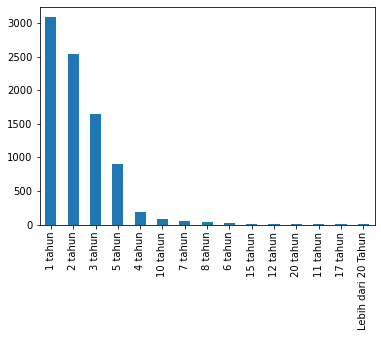

In [28]:
exp.plot(kind = 'bar')
plt.show()

__Explanation__:

The mode of this variable is '1 year', so the missing value will be replaced by '1 year'.

In [29]:
salarydf['experience_level'] = salarydf['experience_level'].fillna(salarydf['experience_level'].mode()[0])

In [30]:
salarydf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9351 entries, 5 to 34745
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9351 non-null   int64  
 1   job_title             9351 non-null   object 
 2   location              9351 non-null   object 
 3   salary_currency       9351 non-null   object 
 4   career_level          9351 non-null   object 
 5   experience_level      9351 non-null   object 
 6   education_level       9351 non-null   object 
 7   employment_type       9351 non-null   object 
 8   job_function          9351 non-null   object 
 9   job_benefits          7069 non-null   object 
 10  company_process_time  6157 non-null   object 
 11  company_size          7927 non-null   object 
 12  company_industry      9059 non-null   object 
 13  job_description       9351 non-null   object 
 14  salary                9351 non-null   float64
dtypes: float64(1), int64

__Explanation__:

After inputing missing values with mode, there are no longer missing values in `experience_level` variable, which can be seen from the number of non-null data (9351 records). There are 4 other variables that have missing values and need to be imputed, namely `job_benefits`, `company_process_time`, `company_size`, and `company_industry`.

In [31]:
salarydf['experience_level'].unique()

array(['1 tahun', '3 tahun', '2 tahun', '5 tahun', '4 tahun', '10 tahun',
       '6 tahun', '8 tahun', '7 tahun', '15 tahun', '12 tahun',
       '11 tahun', '17 tahun', '20 tahun', 'Lebih dari 20 Tahun'],
      dtype=object)

In [32]:
exp_after =  salarydf['experience_level'].value_counts()
exp_after

1 tahun                3864
2 tahun                2537
3 tahun                1638
5 tahun                 898
4 tahun                 180
10 tahun                 90
7 tahun                  52
8 tahun                  41
6 tahun                  24
15 tahun                 11
12 tahun                  8
20 tahun                  5
11 tahun                  1
17 tahun                  1
Lebih dari 20 Tahun       1
Name: experience_level, dtype: int64

__Explanation__:

We chose to impute the missing values with **mode value** because the `experience_level` variable is in the form of **categorical data**.

#### 2. Imputation Job Benefits

In [33]:
salarydf['job_benefits'].unique()

array(['Asuransi kesehatan;Bisnis (contoh: Kemeja);Project Incentive;Senin - Jumat 08.00 s/d 16.30 Sabtu 08.00 s/d 13.00',
       'Tip;Asuransi kesehatan;Waktu regular, Senin - Jumat;Bisnis (contoh: Kemeja);BPJS, Bonus, Annual Reward',
       'Tip;Asuransi kesehatan;Bisnis (contoh: Kemeja);Mondays-Saturdays',
       ..., 'BPJS Kesehatan & Ketenagakerjaan;Senin - Sabtu',
       'Tip;Asuransi kesehatan;Waktu regular, Senin - Jumat;Kasual (contoh: Kaos);ESOP',
       'Asuransi kesehatan;Waktu regular, Senin - Jumat;Bisnis (contoh: Kemeja);BPJS TK'],
      dtype=object)

In [34]:
salarydf['job_benefits'].isna().sum()

2282

__Explanation__:

We can see that`job_benefits` variable has 2282 missing values.

In [35]:
job_ben =  salarydf['job_benefits'].value_counts()
job_ben

Asuransi kesehatan;Waktu regular, Senin - Jumat;Bisnis (contoh: Kemeja)                                                                        495
Asuransi kesehatan;Waktu regular, Senin - Jumat;Kasual (contoh: Kaos)                                                                          258
Waktu regular, Senin - Jumat;Bisnis (contoh: Kemeja)                                                                                           245
Tip;Asuransi kesehatan;Waktu regular, Senin - Jumat;Bisnis (contoh: Kemeja)                                                                    155
Asuransi kesehatan;Parkir;Waktu regular, Senin - Jumat;Bisnis (contoh: Kemeja)                                                                 138
                                                                                                                                              ... 
Tunjangan Pendidikan;Waktu regular, Senin - Jumat;Kasual (contoh: Kaos);Comission                                     

__Explanation__:

The mode of this variable is 'Asuransi kesehatan;Waktu regular, Senin - Jumat;Bisnis (contoh: Kemeja)', so the missing value will be replaced by 'Asuransi kesehatan;Waktu regular, Senin - Jumat;Bisnis (contoh: Kemeja)'.

In [36]:
salarydf['job_benefits'] = salarydf['job_benefits'].fillna(salarydf['job_benefits'].mode()[0])

In [37]:
salarydf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9351 entries, 5 to 34745
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9351 non-null   int64  
 1   job_title             9351 non-null   object 
 2   location              9351 non-null   object 
 3   salary_currency       9351 non-null   object 
 4   career_level          9351 non-null   object 
 5   experience_level      9351 non-null   object 
 6   education_level       9351 non-null   object 
 7   employment_type       9351 non-null   object 
 8   job_function          9351 non-null   object 
 9   job_benefits          9351 non-null   object 
 10  company_process_time  6157 non-null   object 
 11  company_size          7927 non-null   object 
 12  company_industry      9059 non-null   object 
 13  job_description       9351 non-null   object 
 14  salary                9351 non-null   float64
dtypes: float64(1), int64

__Explanation__:

After inputing the missing value with mode, there are no longer missing values in `job_benefits` variable, which can be seen from the number of non-null data (9351 records). However, there are still 3 variables that have missing values, which are `company_process_time`, `company_size`, and `company_industry` variable.

In [38]:
salarydf['job_benefits'].unique()

array(['Asuransi kesehatan;Bisnis (contoh: Kemeja);Project Incentive;Senin - Jumat 08.00 s/d 16.30 Sabtu 08.00 s/d 13.00',
       'Tip;Asuransi kesehatan;Waktu regular, Senin - Jumat;Bisnis (contoh: Kemeja);BPJS, Bonus, Annual Reward',
       'Tip;Asuransi kesehatan;Bisnis (contoh: Kemeja);Mondays-Saturdays',
       ..., 'BPJS Kesehatan & Ketenagakerjaan;Senin - Sabtu',
       'Tip;Asuransi kesehatan;Waktu regular, Senin - Jumat;Kasual (contoh: Kaos);ESOP',
       'Asuransi kesehatan;Waktu regular, Senin - Jumat;Bisnis (contoh: Kemeja);BPJS TK'],
      dtype=object)

In [39]:
job_ben_after =  salarydf['job_benefits'].value_counts()
job_ben_after

Asuransi kesehatan;Waktu regular, Senin - Jumat;Bisnis (contoh: Kemeja)                                                                        2777
Asuransi kesehatan;Waktu regular, Senin - Jumat;Kasual (contoh: Kaos)                                                                           258
Waktu regular, Senin - Jumat;Bisnis (contoh: Kemeja)                                                                                            245
Tip;Asuransi kesehatan;Waktu regular, Senin - Jumat;Bisnis (contoh: Kemeja)                                                                     155
Asuransi kesehatan;Parkir;Waktu regular, Senin - Jumat;Bisnis (contoh: Kemeja)                                                                  138
                                                                                                                                               ... 
Tunjangan Pendidikan;Waktu regular, Senin - Jumat;Kasual (contoh: Kaos);Comission                               

__Explanation__:

We decided to replace the missing values with mode because `job_benefits` variable is in the form of **categorical data**.

#### 3. Imputation Company Process Time

In [40]:
salarydf['company_process_time'].unique()

array(['18 days', '22 days', nan, '29 days', '21 days', '5 days',
       '4 days', '7 days', '26 days', '23 days', '20 days', '28 days',
       '19 days', '1 day', '27 days', '30 days', '12 days', '24 days',
       '6 days', '15 days', '25 days', '17 days', '9 days', '16 days',
       '14 days', '11 days', '3 days', '2 days', '13 days', '10 days',
       '8 days'], dtype=object)

In [41]:
salarydf['company_process_time'].isna().sum()

3194

__Explanation__:

We can see that `company_process_time` variable has 3195 missing values.

In [42]:
com_pro =  salarydf['company_process_time'].value_counts()
com_pro

29 days    1067
28 days     634
27 days     473
26 days     351
25 days     278
24 days     272
16 days     239
21 days     228
23 days     221
19 days     214
30 days     194
20 days     189
22 days     175
14 days     173
3 days      147
1 day       127
4 days      119
7 days      117
18 days     109
12 days     103
17 days      98
5 days       96
15 days      89
9 days       88
2 days       81
13 days      77
8 days       67
6 days       57
11 days      41
10 days      33
Name: company_process_time, dtype: int64

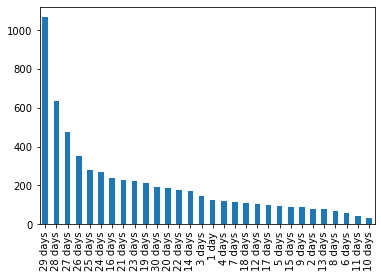

In [43]:
com_pro.plot(kind = 'bar')
plt.show()

__Explanation__:

The mode of this variable is '29 days', so the missing value will be replaced by '29 days'.

In [44]:
salarydf['company_process_time'] = salarydf['company_process_time'].fillna(salarydf['company_process_time'].mode()[0])

In [45]:
salarydf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9351 entries, 5 to 34745
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9351 non-null   int64  
 1   job_title             9351 non-null   object 
 2   location              9351 non-null   object 
 3   salary_currency       9351 non-null   object 
 4   career_level          9351 non-null   object 
 5   experience_level      9351 non-null   object 
 6   education_level       9351 non-null   object 
 7   employment_type       9351 non-null   object 
 8   job_function          9351 non-null   object 
 9   job_benefits          9351 non-null   object 
 10  company_process_time  9351 non-null   object 
 11  company_size          7927 non-null   object 
 12  company_industry      9059 non-null   object 
 13  job_description       9351 non-null   object 
 14  salary                9351 non-null   float64
dtypes: float64(1), int64

__Explanation__:

After inputing the missing value with mode, there are no longer missing values in `company_process_time` variable, which can be seen from the number of non-null data (9351 records). However, there are still two variables that have missing values, namely `company_size` and `company_industry` variable.

In [46]:
salarydf['company_process_time'].unique()

array(['18 days', '22 days', '29 days', '21 days', '5 days', '4 days',
       '7 days', '26 days', '23 days', '20 days', '28 days', '19 days',
       '1 day', '27 days', '30 days', '12 days', '24 days', '6 days',
       '15 days', '25 days', '17 days', '9 days', '16 days', '14 days',
       '11 days', '3 days', '2 days', '13 days', '10 days', '8 days'],
      dtype=object)

In [47]:
com_pro_after =  salarydf['company_process_time'].value_counts()
com_pro_after

29 days    4261
28 days     634
27 days     473
26 days     351
25 days     278
24 days     272
16 days     239
21 days     228
23 days     221
19 days     214
30 days     194
20 days     189
22 days     175
14 days     173
3 days      147
1 day       127
4 days      119
7 days      117
18 days     109
12 days     103
17 days      98
5 days       96
15 days      89
9 days       88
2 days       81
13 days      77
8 days       67
6 days       57
11 days      41
10 days      33
Name: company_process_time, dtype: int64

__Explanation__:

We decided to remove the missing values with mode because the `company_process_time` variable is in the form of **categorical data**.

#### 4. Imputation Company Size

In [48]:
salarydf['company_size'].unique()

array(['51 - 200 pekerja', '1- 50 pekerja', '201 - 500 pekerja',
       '501 - 1000 pekerja', nan, '2001 - 5000 pekerja',
       'Lebih dari 5000 pekerja', '1001 - 2000 pekerja'], dtype=object)

In [49]:
salarydf['company_size'].isna().sum()

1424

__Explanation__:

We can see that `company_size` variable has 1424 missing values.

In [50]:
comp_sz =  salarydf['company_size'].value_counts()
comp_sz

1- 50 pekerja              2815
51 - 200 pekerja           2327
201 - 500 pekerja          1012
501 - 1000 pekerja          631
1001 - 2000 pekerja         509
Lebih dari 5000 pekerja     334
2001 - 5000 pekerja         299
Name: company_size, dtype: int64

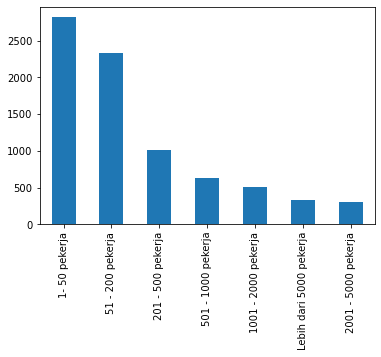

In [51]:
comp_sz.plot(kind = 'bar')
plt.show()

__Explanation__:

The mode of this variable is '1-50 pekerja', so the missing value will be replaced by '29 days'.

We also get insight that most of the companies in this dataset are **start-up companies** because they only have 1-50 workers.

In [52]:
salarydf['company_size'] = salarydf['company_size'].fillna(salarydf['company_size'].mode()[0])

In [53]:
salarydf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9351 entries, 5 to 34745
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9351 non-null   int64  
 1   job_title             9351 non-null   object 
 2   location              9351 non-null   object 
 3   salary_currency       9351 non-null   object 
 4   career_level          9351 non-null   object 
 5   experience_level      9351 non-null   object 
 6   education_level       9351 non-null   object 
 7   employment_type       9351 non-null   object 
 8   job_function          9351 non-null   object 
 9   job_benefits          9351 non-null   object 
 10  company_process_time  9351 non-null   object 
 11  company_size          9351 non-null   object 
 12  company_industry      9059 non-null   object 
 13  job_description       9351 non-null   object 
 14  salary                9351 non-null   float64
dtypes: float64(1), int64

__Explanation__:

After inputing the missing values with mode, there are no longer missing values in the `company_size` variable, which can be seen from the number of non-null data (9351 records). This leaves only the `company_industry` variable with missing values.

In [54]:
salarydf['company_size'].unique()

array(['51 - 200 pekerja', '1- 50 pekerja', '201 - 500 pekerja',
       '501 - 1000 pekerja', '2001 - 5000 pekerja',
       'Lebih dari 5000 pekerja', '1001 - 2000 pekerja'], dtype=object)

In [55]:
comp_sz_after =  salarydf['company_size'].value_counts()
comp_sz_after

1- 50 pekerja              4239
51 - 200 pekerja           2327
201 - 500 pekerja          1012
501 - 1000 pekerja          631
1001 - 2000 pekerja         509
Lebih dari 5000 pekerja     334
2001 - 5000 pekerja         299
Name: company_size, dtype: int64

__Explanation__:

We remove the missing values with mode because the `company_size` variable is in the form of **categorical data**.

#### 5. Imputation Company Industry

In [56]:
salarydf['company_industry'].unique()

array(['Manufaktur/Produksi', 'Konstruksi/Bangunan/Teknik',
       'Elektrikal & Elektronik',
       'Konsultasi (IT, Ilmu Pengetahuan, Teknis & Teknikal)',
       'Automobil/Mesin Tambahan Automotif/Kendaraan',
       'Komputer/Teknik Informatika (Perangkat Lunak)', 'Umum & Grosir',
       'Industri Berat/Mesin/Peralatan', 'Asuransi', nan,
       'Pelayanan Perbaikan & Pemeliharaan', 'Manajemen/Konsulting HR',
       'Produk Konsumen/Barang konsumen yang bergerak cepat',
       'Makanan & Minuman/Katering/Restoran', 'Transportasi/Logistik',
       'Pendidikan', 'Periklanan/Marketing/Promosi/Hubungan Masyarakat',
       'Lainnya', 'Retail/Merchandise', 'Perbankan/Pelayanan Keuangan',
       'Telekomunikasi', 'Kayu/Fiber/Kertas', 'Properti/Real Estate',
       'Seni/Desain/Fashion', 'Kesehatan/Medis',
       'Akunting / Audit / Layanan Pajak', 'Pertambangan',
       'Perawatan/Kecantikan/Fitnes',
       'Agrikultural/Perkebunan/Peternakan Unggas/Perikanan',
       'Pelayanan Arsitek/Des

In [57]:
salarydf['company_industry'].isna().sum()

292

__Explanation__:

We can see that `company_industry` variable has 292 missing values.

In [58]:
comp_ind =  salarydf['company_industry'].value_counts()
comp_ind

Manufaktur/Produksi                                     744
Makanan & Minuman/Katering/Restoran                     728
Umum & Grosir                                           628
Retail/Merchandise                                      607
Manajemen/Konsulting HR                                 587
Komputer/Teknik Informatika (Perangkat Lunak)           564
Perbankan/Pelayanan Keuangan                            482
Lainnya                                                 310
Konstruksi/Bangunan/Teknik                              309
Konsultasi (IT, Ilmu Pengetahuan, Teknis & Teknikal)    286
Kesehatan/Medis                                         283
Transportasi/Logistik                                   244
Automobil/Mesin Tambahan Automotif/Kendaraan            238
Pendidikan                                              235
Konsultasi (Bisnis & Manajemen)                         222
Asuransi                                                213
Properti/Real Estate                    

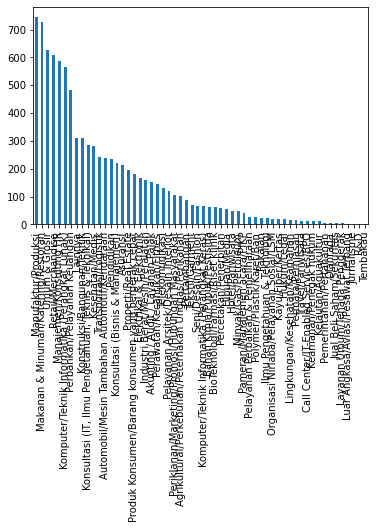

In [59]:
comp_ind.plot(kind = 'bar')
plt.show()

__Explanation__:

The mode of this variable is 'Manufaktur/Produksi', so the missing value will be replaced by 'Manufaktur/Produksi'.

In [60]:
salarydf['company_industry'] = salarydf['company_industry'].fillna(salarydf['company_industry'].mode()[0])

In [61]:
salarydf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9351 entries, 5 to 34745
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9351 non-null   int64  
 1   job_title             9351 non-null   object 
 2   location              9351 non-null   object 
 3   salary_currency       9351 non-null   object 
 4   career_level          9351 non-null   object 
 5   experience_level      9351 non-null   object 
 6   education_level       9351 non-null   object 
 7   employment_type       9351 non-null   object 
 8   job_function          9351 non-null   object 
 9   job_benefits          9351 non-null   object 
 10  company_process_time  9351 non-null   object 
 11  company_size          9351 non-null   object 
 12  company_industry      9351 non-null   object 
 13  job_description       9351 non-null   object 
 14  salary                9351 non-null   float64
dtypes: float64(1), int64

__Explanation__:

After inputing the missing values with mode, there are no longer missing values in the `company_industry` variable, which can be seen from the number of non-null data (9351 records). As a result, there are no longer missing values ​​in this dataset.

In [62]:
salarydf['company_industry'].unique()

array(['Manufaktur/Produksi', 'Konstruksi/Bangunan/Teknik',
       'Elektrikal & Elektronik',
       'Konsultasi (IT, Ilmu Pengetahuan, Teknis & Teknikal)',
       'Automobil/Mesin Tambahan Automotif/Kendaraan',
       'Komputer/Teknik Informatika (Perangkat Lunak)', 'Umum & Grosir',
       'Industri Berat/Mesin/Peralatan', 'Asuransi',
       'Pelayanan Perbaikan & Pemeliharaan', 'Manajemen/Konsulting HR',
       'Produk Konsumen/Barang konsumen yang bergerak cepat',
       'Makanan & Minuman/Katering/Restoran', 'Transportasi/Logistik',
       'Pendidikan', 'Periklanan/Marketing/Promosi/Hubungan Masyarakat',
       'Lainnya', 'Retail/Merchandise', 'Perbankan/Pelayanan Keuangan',
       'Telekomunikasi', 'Kayu/Fiber/Kertas', 'Properti/Real Estate',
       'Seni/Desain/Fashion', 'Kesehatan/Medis',
       'Akunting / Audit / Layanan Pajak', 'Pertambangan',
       'Perawatan/Kecantikan/Fitnes',
       'Agrikultural/Perkebunan/Peternakan Unggas/Perikanan',
       'Pelayanan Arsitek/Desain I

In [63]:
comp_ind_after =  salarydf['company_industry'].value_counts()
comp_ind_after

Manufaktur/Produksi                                     1036
Makanan & Minuman/Katering/Restoran                      728
Umum & Grosir                                            628
Retail/Merchandise                                       607
Manajemen/Konsulting HR                                  587
Komputer/Teknik Informatika (Perangkat Lunak)            564
Perbankan/Pelayanan Keuangan                             482
Lainnya                                                  310
Konstruksi/Bangunan/Teknik                               309
Konsultasi (IT, Ilmu Pengetahuan, Teknis & Teknikal)     286
Kesehatan/Medis                                          283
Transportasi/Logistik                                    244
Automobil/Mesin Tambahan Automotif/Kendaraan             238
Pendidikan                                               235
Konsultasi (Bisnis & Manajemen)                          222
Asuransi                                                 213
Properti/Real Estate    

__Explanation__:

We decided to replace the missing values with mode value because the `company_industry` variable is in the form of **categorical data**.

## **DATA PREPARATION : DATA TRANSFORMATION**

### Convert salary in currency USD to IDR

In [64]:
salarydf['salary_currency'].unique()

array(['IDR', 'USD'], dtype=object)

In [65]:
for x in salarydf.index :
    if (salarydf['salary_currency'][x]) == 'USD' : 
        salarydf['salary'][x] = salarydf['salary'][x] * 14327
        salarydf['salary_currency'][x] = 'IDR'
        #tanggal 13 March 2022 sesuai tanggal data di scrap

In [66]:
salarydf['salary_currency'].unique()

array(['IDR'], dtype=object)

__Explanation__:

Currently there are 2 types of salary currency (USD and IDR), so we need to equalize the salary values. Since, we're working with a dataset representing Indonesia, we're going to convert the salary value of all records with "USD" currency to the value in "IDR" currency by multiplying it with the exchange rate of IDR in the dataset's current date (13 March 2022).

### Tidying Up Each Variables

In [67]:
salarydf['experience_level'] = salarydf['experience_level'].str.replace(' tahun', '', regex = True)
salarydf['company_process_time'] = salarydf['company_process_time'].str.replace(' days', '', regex = True)
salarydf['company_process_time'] = salarydf['company_process_time'].str.replace(' day', '', regex = True)

__Explanation__:

We decided to change the data type to integer because days and years are numerical values. But due to the characters behind the number of days and years, the data type of those 2 variables was assumed as object.

So, we removed the characters ('days', 'tahun') after the integer value in 'company_process_time' and 'experience_level' variable so we can convert the data type into integer.

In [68]:
salarydf.head()

,id,job_title,location,salary_currency,career_level,experience_level,education_level,employment_type,job_function,job_benefits,company_process_time,company_size,company_industry,job_description,salary
5,6,KEPALA PABRIK,Balikpapan,IDR,Supervisor/Koordinator,1,"Sertifikat Professional, D3 (Diploma), D4 (Dip...",Penuh Waktu,"Manufaktur,Manufaktur",Asuransi kesehatan;Bisnis (contoh: Kemeja);Pro...,18,51 - 200 pekerja,Manufaktur/Produksi,"Tedmond Groups membuka Lowongan Kepala Pabrik,...",10500000.0
9,10,Tax Supervisor,Banten,IDR,Supervisor/Koordinator,3,"Sertifikat Professional, D3 (Diploma), D4 (Dip...",Penuh Waktu,"Akuntansi / Keuangan,Audit & Pajak","Tip;Asuransi kesehatan;Waktu regular, Senin - ...",22,51 - 200 pekerja,Konstruksi/Bangunan/Teknik,ResponsibilitiesPrepare corporate income tax (...,8000000.0
18,19,Accounting Staff,Jakarta Pusat,IDR,Pegawai (non-manajemen & non-supervisor),1,"SMA, SMU/SMK/STM, Sertifikat Professional, D3 ...",Penuh Waktu,"Akuntansi / Keuangan,Akuntansi Umum / Pembiayaan",Tip;Asuransi kesehatan;Bisnis (contoh: Kemeja)...,29,1- 50 pekerja,Manufaktur/Produksi,DESKRIPSI PEKERJAAN:Memeriksa dan/atau membuat...,4750000.0
22,23,Senior Staff Purchasing,Surabaya,IDR,Pegawai (non-manajemen & non-supervisor),2,"Sertifikat Professional, D3 (Diploma), D4 (Dip...",Penuh Waktu,"Manufaktur,Pembelian/Manajemen Material",Asuransi kesehatan;Jam Bekerja yang Panjang;Bi...,29,1- 50 pekerja,Elektrikal & Elektronik,Deskripsi Pekerjaan:Mampu melakukan rencana pe...,5250000.0
26,27,MARKETING COMMUNICATION & CHANNEL MANAGER,Jakarta Pusat,IDR,Manajer/Asisten Manajer,2,Tidak terspesifikasi,Penuh Waktu,"Penjualan / Pemasaran,Pemasaran/Pengembangan B...",Asuransi Gigi;Asuransi kesehatan;Parkir;Waktu ...,29,51 - 200 pekerja,"Konsultasi (IT, Ilmu Pengetahuan, Teknis & Tek...","SCOPE OF ROLE :To plan, develop, implement and...",15000000.0


In [69]:
salarydf['experience_level'].value_counts()

1                      3864
2                      2537
3                      1638
5                       898
4                       180
10                       90
7                        52
8                        41
6                        24
15                       11
12                        8
20                        5
11                        1
17                        1
Lebih dari 20 Tahun       1
Name: experience_level, dtype: int64

__Explanation__:

Because there is only 1 record with `experience_level` of 'Lebih dari 20 Tahun', we are going to remove it so we can convert the data type of variable `experience_level` into integer.

In [70]:
index_exp = salarydf[(salarydf['experience_level'] == 'Lebih dari 20 Tahun')].index
salarydf.drop(index_exp , inplace=True)
salarydf['experience_level'].value_counts()

1     3864
2     2537
3     1638
5      898
4      180
10      90
7       52
8       41
6       24
15      11
12       8
20       5
11       1
17       1
Name: experience_level, dtype: int64

In [71]:
salarydf['experience_level'] = salarydf['experience_level'].astype('int')
salarydf['company_process_time'] = salarydf['company_process_time'].astype('int')

salarydf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9350 entries, 5 to 34745
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9350 non-null   int64  
 1   job_title             9350 non-null   object 
 2   location              9350 non-null   object 
 3   salary_currency       9350 non-null   object 
 4   career_level          9350 non-null   object 
 5   experience_level      9350 non-null   int32  
 6   education_level       9350 non-null   object 
 7   employment_type       9350 non-null   object 
 8   job_function          9350 non-null   object 
 9   job_benefits          9350 non-null   object 
 10  company_process_time  9350 non-null   int32  
 11  company_size          9350 non-null   object 
 12  company_industry      9350 non-null   object 
 13  job_description       9350 non-null   object 
 14  salary                9350 non-null   float64
dtypes: float64(1), int32

__Explanation__:

The output shows that we have successfully changed the data type of `experience_level` and `company_process_time` variables from object to integer. 

### Cheking Duplicate Value

In [72]:
duplicateRowsDF = salarydf[salarydf.duplicated()]
print(duplicateRowsDF)

Empty DataFrame
Columns: [id, job_title, location, salary_currency, career_level, experience_level, education_level, employment_type, job_function, job_benefits, company_process_time, company_size, company_industry, job_description, salary]
Index: []


__Explanation__:
- It is confirmed that our records are all unique.

### Checking Distribution Of Dataset

In [73]:
salarydf.describe().T

,count,mean,std,min,25%,50%,75%,max
id,9350.0,2.144322e+04,1.110719e+04,6.0,11865.25,23321.0,32407.75,34746.0
experience_level,9350.0,2.265989e+00,1.704050e+00,1.0,1.00,2.0,3.00,20.0
company_process_time,9350.0,2.379198e+01,7.803326e+00,1.0,21.00,28.0,29.00,30.0
salary,9350.0,7.148199e+06,6.064939e+06,10.0,4250000.00,5500000.0,8000000.00,120000000.0


In [74]:
salarydf.skew()

id                     -0.397799
experience_level        2.811288
company_process_time   -1.530456
salary                  6.378620
dtype: float64

__Explanation__:
- The description function is only able to work with numerical number, therefore not all variables are displayed here.
- `id` has unique values so the description we have above won't be useful in determining our data distribution.
- `experience_level` from the mean value we can see that our data is highly skewed to the right (positive skew), which means the distribution is asymmetrical. This can also be seen from the mean value (2.265...) which is greater than the median value (2.0). 
- `company_process_time` is highly skewed to the left (negative skew), which means the distribution is asymmetrical. This can also be seen from the mean value (2.37...) which is smaller than the median value (28).
- `salary` is also highly skewed to the right (positive skew), which means the distribution is asymmetrical. This can also be seen from the mean value (7148199) which is greater than the median value (5500000). 

In [75]:
salarydf.columns

Index(['id', 'job_title', 'location', 'salary_currency', 'career_level',
       'experience_level', 'education_level', 'employment_type',
       'job_function', 'job_benefits', 'company_process_time', 'company_size',
       'company_industry', 'job_description', 'salary'],
      dtype='object')

#### Check If the Distributions are Linear or Monotonic

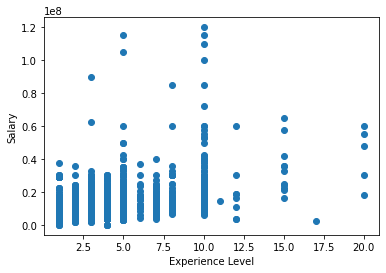

In [76]:
plt.scatter(salarydf.experience_level, salarydf.salary)
plt.xlabel('Experience Level')
plt.ylabel('Salary')
plt.show()

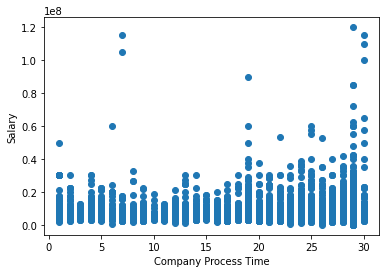

In [77]:
plt.scatter(salarydf.company_process_time, salarydf.salary)
plt.xlabel('Company Process Time')
plt.ylabel('Salary')
plt.show()

__Explanation__:

The distribution of each numerical features to the target variable is non-monotonic because the data points are completely random, and there are no visible linear pattern or a pattern indicating a directional trend of the curve

### Grouping Location

In [78]:
salarydf['location'].unique()

array(['Balikpapan', 'Banten', 'Jakarta Pusat', 'Surabaya', 'Papua',
       'Tangerang', 'Jakarta Timur', 'Jakarta Barat', 'Maluku Utara',
       'Jakarta Raya', 'Sidoarjo', 'Jakarta Utara', 'Bali', 'Batam',
       'Jawa Barat', 'Jawa Timur', 'Aceh', 'Jakarta Selatan', 'Cilegon',
       'Sumatera Utara', 'Semarang', 'Jambi', 'Cikarang', 'Palembang',
       'Riau', 'Pasuruan', 'Bekasi', 'Sulawesi Tengah', 'Makassar',
       'Bandung', 'Padang', 'Sumatera Selatan', 'Rangkasbitung', 'Serang',
       'Kapuas', 'Yogyakarta', 'Cianjur', 'Badung', 'Banjarmasin',
       'Kediri', 'Tanah Bumbu', 'Samarinda', 'Bengkulu', 'Banjarnegara',
       'Cirebon', 'Pekanbaru', 'Bandar Lampung', 'Bogor',
       'Kalimantan Barat', 'Maros', 'Sleman', 'Gresik', 'Nunukan',
       'Depok', 'Medan', 'Seminyak', 'Karawang', 'Purwokerto',
       'Jawa Tengah', 'Sukabumi', 'Mojokerto', 'Sumatera Barat',
       'Lhokseumawe', 'Denpasar', 'Klungkung', 'Tegal',
       'Kalimantan Timur', 'Lampung', 'Surakarta', 'Purw

In [79]:
salarydf['location'].value_counts()

Jakarta Raya       1825
Jakarta Selatan     721
Jakarta Barat       679
Tangerang           554
Jakarta Utara       543
                   ... 
Probolinggo           1
Minahasa              1
Batu                  1
Kepulauan Riau        1
Papua Barat           1
Name: location, Length: 173, dtype: int64

__Explanation__:
- The `location` values represent cities in Indonesia. In order to makesure there are some correlation between our target variable and `location` we decided to reduce the values by grouping those cities to their respective province. (Based on Indonesia's government, currently Indonesia has 34 provinces)

In [80]:
for x in salarydf.index :
    if (salarydf['location'][x] == 'Bali') | (salarydf['location'][x] == 'Badung') | (salarydf['location'][x] == 'Seminyak') | (salarydf['location'][x] == 'Denpasar') | (salarydf['location'][x] == 'Klungkung') | (salarydf['location'][x] == 'Kuta') | (salarydf['location'][x] == 'Gianyar') | (salarydf['location'][x] == 'Ubud'): 
        salarydf['location'][x] = 'Bali'
    elif (salarydf['location'][x] == 'Banten') | (salarydf['location'][x] == 'Tangerang') | (salarydf['location'][x] == 'Cilegon') | (salarydf['location'][x] == 'Rangkasbitung') | (salarydf['location'][x] == 'Serang') | (salarydf['location'][x] == 'Cikupa') | (salarydf['location'][x] == 'Pandeglang'): 
        salarydf['location'][x] = 'Banten'
    elif (salarydf['location'][x] == 'Bengkulu'): 
        salarydf['location'][x] = 'Bengkulu'
    elif (salarydf['location'][x] == 'Yogyakarta') | (salarydf['location'][x] == 'Sleman') | (salarydf['location'][x] == 'Bantul'):
        salarydf['location'][x] = 'DIY'
    elif (salarydf['location'][x] == 'Jakarta Pusat') | (salarydf['location'][x] == 'Jakarta Timur') | (salarydf['location'][x] == 'Jakarta Barat') | (salarydf['location'][x] == 'Jakarta Utara') | (salarydf['location'][x] == 'Jakarta Raya') | (salarydf['location'][x] == 'Jakarta Selatan') | (salarydf['location'][x] == 'Kepulauan Seribu'):
        salarydf['location'][x] = 'DKI Jakarta'
    elif (salarydf['location'][x] == 'Gorontalo'): 
        salarydf['location'][x] = 'Gorontalo'
    elif (salarydf['location'][x] == 'Jambi'): 
        salarydf['location'][x] = 'Jambi' 
    elif (salarydf['location'][x] == 'Jawa Barat') | (salarydf['location'][x] == 'Cikarang') | (salarydf['location'][x] == 'Bekasi') | (salarydf['location'][x] == 'Bandung') | (salarydf['location'][x] == 'Cianjur') | (salarydf['location'][x] == 'Cirebon') | (salarydf['location'][x] == 'Bogor') | (salarydf['location'][x] == 'Depok') | (salarydf['location'][x] == 'Karawang') | (salarydf['location'][x] == 'Sukabumi') | (salarydf['location'][x] == 'Purwakarta') | (salarydf['location'][x] == 'Cibinong') | (salarydf['location'][x] == 'Banjar') | (salarydf['location'][x] == 'Cimahi') | (salarydf['location'][x] == 'Citeureup') | (salarydf['location'][x] == 'Tasikmalaya') | (salarydf['location'][x] == 'Cileungsi'):  
        salarydf['location'][x] = 'Jawa Barat'
    elif (salarydf['location'][x] == 'Semarang') | (salarydf['location'][x] == 'Banjarnegara') | (salarydf['location'][x] == 'Purwokerto') | (salarydf['location'][x] == 'Jawa Tengah') | (salarydf['location'][x] == 'Tegal') | (salarydf['location'][x] == 'Surakarta') | (salarydf['location'][x] == 'Magelang') | (salarydf['location'][x] == 'Jepara') | (salarydf['location'][x] == 'Pekalongan') | (salarydf['location'][x] == 'Cilacap') | (salarydf['location'][x] == 'Pemalang') | (salarydf['location'][x] == 'Klaten') | (salarydf['location'][x] == 'Kulon Progo') | (salarydf['location'][x] == 'Brebes') | (salarydf['location'][x] == 'Demak') | (salarydf['location'][x] == 'Purworejo') | (salarydf['location'][x] == 'Kudus') | (salarydf['location'][x] == 'Salatiga') | (salarydf['location'][x] == 'Ungaran') | (salarydf['location'][x] == 'Wonogiri ') | (salarydf['location'][x] == 'Purbalingga'):  
        salarydf['location'][x] = 'Jawa Tengah'  
    elif (salarydf['location'][x] == 'Surabaya') | (salarydf['location'][x] == 'Sidoarjo') | (salarydf['location'][x] == 'Jawa Timur') | (salarydf['location'][x] == 'Pasuruan') | (salarydf['location'][x] == 'Kediri') | (salarydf['location'][x] == 'Gresik') | (salarydf['location'][x] == 'Mojokerto') | (salarydf['location'][x] == 'Malang') | (salarydf['location'][x] == 'Madiun') | (salarydf['location'][x] == 'Jember') | (salarydf['location'][x] == 'Banyuwangi') | (salarydf['location'][x] == 'Madura') | (salarydf['location'][x] == 'Tuban') | (salarydf['location'][x] == 'Probolinggo') | (salarydf['location'][x] == 'Blitar') | (salarydf['location'][x] == 'Ponorogo') | (salarydf['location'][x] == 'Batu'):  
        salarydf['location'][x] = 'Jawa Timur' 
    elif (salarydf['location'][x] == 'Kalimantan Barat') | (salarydf['location'][x] == 'Pontianak') | (salarydf['location'][x] == 'Ketapang') | (salarydf['location'][x] == 'Singkawang'):  
        salarydf['location'][x] = 'Kalimantan Barat'     
    elif (salarydf['location'][x] == 'Banjarmasin') | (salarydf['location'][x] == 'Tanah Bumbu') | (salarydf['location'][x] == 'Kalimatan Selatan') | (salarydf['location'][x] == 'Banjarbaru') | (salarydf['location'][x] == 'Kotabaru') | (salarydf['location'][x] == 'Hulu Sungai Tengah'):  
        salarydf['location'][x] = 'Kalimantan Selatan'
    elif (salarydf['location'][x] == 'Kapuas') | (salarydf['location'][x] == 'Kotawaringin Timur') | (salarydf['location'][x] == 'Palangkaraya') | (salarydf['location'][x] == 'Murung Raya') | (salarydf['location'][x] == 'Kotawaringin Barat'):  
        salarydf['location'][x] = 'Kalimantan Tengah'
    elif (salarydf['location'][x] == 'Balikpapan') | (salarydf['location'][x] == 'Samarinda') | (salarydf['location'][x] == 'Kalimantan Timur') | (salarydf['location'][x] == '') | (salarydf['location'][x] == 'Kutai Kartanegara') | (salarydf['location'][x] == 'Bontang') | (salarydf['location'][x] == 'Penajam Paser Utara') | (salarydf['location'][x] == 'Kutai Timur') | (salarydf['location'][x] == 'Kutai Kartanegara') | (salarydf['location'][x] == 'Bontang') | (salarydf['location'][x] == 'Kutai Barat'):  
        salarydf['location'][x] = 'Kalimantan Timur'
    elif (salarydf['location'][x] == 'Kalimantan Utara') | (salarydf['location'][x] == 'Nunukan') | (salarydf['location'][x] == 'Tarakan'):  
        salarydf['location'][x] = 'Kalimantan Utara'
    elif (salarydf['location'][x] == 'Batam') | (salarydf['location'][x] == 'Tanjung Pinang') | (salarydf['location'][x] == 'Kepulauan Riau'):  
        salarydf['location'][x] = 'Kepulauan Riau'  
    elif (salarydf['location'][x] == 'Bangka') | (salarydf['location'][x] == 'Belitung') | (salarydf['location'][x] == 'Bintan') | (salarydf['location'][x] == 'Bangka Belitung') | (salarydf['location'][x] == 'Pangkal Pinang'):  
        salarydf['location'][x] = 'Kepulauan Bangka Belitung'
    elif (salarydf['location'][x] == 'Bandar Lampung') | (salarydf['location'][x] == 'Lampung') | (salarydf['location'][x] == 'Metro'):  
        salarydf['location'][x] = 'Lampung'
    elif (salarydf['location'][x] == 'Ambon') | (salarydf['location'][x] == 'Maluku'):  
        salarydf['location'][x] = 'Maluku'
    elif (salarydf['location'][x] == 'Maluku Utara') | (salarydf['location'][x] == 'Ternate') | (salarydf['location'][x] == 'Halmahera'):  
        salarydf['location'][x] = 'Maluku Utara'
    elif (salarydf['location'][x] == 'Aceh') | (salarydf['location'][x] == 'Lhokseumawe') | (salarydf['location'][x] == 'Kota Banda Aceh'):  
        salarydf['location'][x] = 'NAD'
    elif (salarydf['location'][x] == 'Mataram') | (salarydf['location'][x] == 'Nusa Tenggara Barat') | (salarydf['location'][x] == 'Lombok') | (salarydf['location'][x] == 'Bima'):  
        salarydf['location'][x] = 'NTB'
    elif (salarydf['location'][x] == 'Nusa Tenggara Timur') | (salarydf['location'][x] == 'Kupang'):  
        salarydf['location'][x] = 'NTT'
    elif (salarydf['location'][x] == 'Papua') | (salarydf['location'][x] == 'Jayapura') | (salarydf['location'][x] == 'Timika'):  
        salarydf['location'][x] = 'Papua'
    elif (salarydf['location'][x] == 'Manokwari') | (salarydf['location'][x] == 'Papua Barat'):  
        salarydf['location'][x] = 'Papua Barat'
    elif (salarydf['location'][x] == 'Riau') | (salarydf['location'][x] == 'Pekanbaru') | (salarydf['location'][x] == 'Dumai'):  
        salarydf['location'][x] = 'Riau'
    elif (salarydf['location'][x] == 'Sulawesi Barat') | (salarydf['location'][x] == 'Mamuju'):  
        salarydf['location'][x] = 'Sulawesi Barat'
    elif (salarydf['location'][x] == 'Makassar') | (salarydf['location'][x] == 'Maros') | (salarydf['location'][x] == 'Palopo') | (salarydf['location'][x] == 'Sulawesi Selatan') | (salarydf['location'][x] == 'Gowa') | (salarydf['location'][x] == 'Pare-Pare'):  
        salarydf['location'][x] = 'Sulawesi Selatan'
    elif (salarydf['location'][x] == 'Sulawesi Tengah') | (salarydf['location'][x] == 'Palu') | (salarydf['location'][x] == 'Poso'):  
        salarydf['location'][x] = 'Sulawesi Tengah' 
    elif (salarydf['location'][x] == 'Sulawesi Tenggara') | (salarydf['location'][x] == 'Kendari'):  
        salarydf['location'][x] = 'Sulawesi Tenggara'   
    elif (salarydf['location'][x] == 'Sulawesi Utara') | (salarydf['location'][x] == 'Manado') | (salarydf['location'][x] == 'Minahasa') | (salarydf['location'][x] == 'Bitung'):  
        salarydf['location'][x] = 'Sulawesi Utara'
    elif (salarydf['location'][x] == 'Padang') | (salarydf['location'][x] == 'Sumatera Barat') | (salarydf['location'][x] == 'Bukittinggi'):  
        salarydf['location'][x] = 'Sumatera Barat'
    elif (salarydf['location'][x] == 'Palembang') | (salarydf['location'][x] == 'Sumatera Selatan') | (salarydf['location'][x] == 'Muara Enim') | (salarydf['location'][x] == 'Prabumulih'):  
        salarydf['location'][x] = 'Sumatera Selatan' 
    elif (salarydf['location'][x] == 'Sumatera Utara') | (salarydf['location'][x] == 'Medan') | (salarydf['location'][x] == 'Binjai') | (salarydf['location'][x] == 'Tanjung Balai')  | (salarydf['location'][x] == 'Sibolga')  | (salarydf['location'][x] == 'Pematangsiantar'):  
        salarydf['location'][x] = 'Sumatera Utara'                                

In [81]:
salarydf['location'].unique()

array(['Kalimantan Timur', 'Banten', 'DKI Jakarta', 'Jawa Timur', 'Papua',
       'Maluku Utara', 'Bali', 'Kepulauan Riau', 'Jawa Barat', 'NAD',
       'Sumatera Utara', 'Jawa Tengah', 'Jambi', 'Sumatera Selatan',
       'Riau', 'Sulawesi Tengah', 'Sulawesi Selatan', 'Sumatera Barat',
       'Kalimantan Tengah', 'DIY', 'Kalimantan Selatan', 'Bengkulu',
       'Lampung', 'Kalimantan Barat', 'Kalimantan Utara', 'NTT',
       'Sulawesi Utara', 'Sulawesi Barat', 'NTB', 'Sulawesi Tenggara',
       'Maluku', 'Kepulauan Bangka Belitung', 'Gorontalo', 'Papua Barat'],
      dtype=object)

__Explanation__:
- The transformation succeed, and now we only have 34 values for the variable `location` and it's now all in Province and not cities.

In [82]:
salarydf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9350 entries, 5 to 34745
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9350 non-null   int64  
 1   job_title             9350 non-null   object 
 2   location              9350 non-null   object 
 3   salary_currency       9350 non-null   object 
 4   career_level          9350 non-null   object 
 5   experience_level      9350 non-null   int32  
 6   education_level       9350 non-null   object 
 7   employment_type       9350 non-null   object 
 8   job_function          9350 non-null   object 
 9   job_benefits          9350 non-null   object 
 10  company_process_time  9350 non-null   int32  
 11  company_size          9350 non-null   object 
 12  company_industry      9350 non-null   object 
 13  job_description       9350 non-null   object 
 14  salary                9350 non-null   float64
dtypes: float64(1), int32

__Explanation__:
- Checking whether all values has been replaced and there are no missing values.

### Grouping Salary Based On Minimum Wage

The list shown is the minimum salary of each province in Indonesia per 2022.
1. Aceh Rp 3.166.460
2. Sumatera Utara Rp 2.522.609
3. Sumatera Barat Rp 2.512.539
4. Sumatera Selatan Rp 3.144.776
5. Riau Rp 2.938.564
6. Kepulauan Riau Rp 3.050.172
7. Jambi Rp 2.649.034
8. Bengkulu Rp 2.238.094
9. Lampung Rp 2.440.485
10. Kepulauan Bangka Belitung Rp 3.264.883
11. DKI Jakarta Rp 4.641.854
12. Jawa Barat Rp 1.841.486
13. Jawa tengah Rp 1.812.935
14. DI Yogyakarta Rp 1.840.915
15. Jawa Timur Rp 1.891.567
16. Banten Rp 2.501.202
17. Bali Rp 2.516.971
18. Nusa Tenggara Barat Rp 2.207.212
19. Nusa Tenggara Timur Rp 1.975.000
20. Kalimantan Barat Rp 2.434.327
21. Kalimantan Tengah Rp 2.922.515
22. Kalimantan Selatan Rp 2.906.472
23. Kalimantan Timur Rp 3.014.496
24. Kalimantan Utara Rp 3.016.738
25. Sulawesi Utara Rp 3.310.723
26. Sulawesi Tengah Rp 2.390.739
27. Sulawesi Selatan Rp 3.165.876
28. Sulawesi Tenggara Rp 2.710.595
29. Gorontalo Rp 2.800.580
30. Sulawesi Barat Rp 2.678.863
31. Maluku Rp 2.619.312
32. Maluku Utara Rp 2.862.231
33. Papua Barat Rp 3.200.000
34. Papua Rp 3.561.932

In [83]:
salarydf.groupby('location')['salary'].min()

location
Bali                         1050000.0
Banten                       1125000.0
Bengkulu                     2863085.0
DIY                               10.0
DKI Jakarta                       10.0
Gorontalo                    2185000.0
Jambi                        2160000.0
Jawa Barat                    800000.0
Jawa Tengah                  1500000.0
Jawa Timur                      5300.0
Kalimantan Barat             2160000.0
Kalimantan Selatan           1800000.0
Kalimantan Tengah            2750000.0
Kalimantan Timur             1350000.0
Kalimantan Utara             2880000.0
Kepulauan Bangka Belitung    2875000.0
Kepulauan Riau               2750000.0
Lampung                      2160000.0
Maluku                            15.0
Maluku Utara                 2880000.0
NAD                          3400000.0
NTB                          2875000.0
NTT                          2400000.0
Papua                        2250000.0
Papua Barat                  3750000.0
Riau            

__Explanation__:
- The list above showed us that there are some of the salary that has a very small value (< IDR 50.000). Therefore, we are going to check those data.

In [84]:
idx_salary_50 = []
for x in salarydf.index :
  if (salarydf['salary'][x] < 50000):
    idx_salary_50.append(x)
salarydf.loc[idx_salary_50]

,id,job_title,location,salary_currency,career_level,experience_level,education_level,employment_type,job_function,job_benefits,company_process_time,company_size,company_industry,job_description,salary
2821,2822,Freelance Senior Programmer Aplikasi Pendidikan,DKI Jakarta,IDR,Manajer/Asisten Manajer,4,"Sertifikat Professional, D3 (Diploma), D4 (Dip...",Paruh Waktu,"Komputer/Teknologi Informasi,IT-Perangkat Lunak",Asuransi Gigi;Tunjangan Pendidikan;Asuransi ke...,29,201 - 500 pekerja,"Konsultasi (IT, Ilmu Pengetahuan, Teknis & Tek...",Deskripsi Pekerjaan:Sebuah perusahaan yang sed...,10.0
8623,8624,Staff Marketing,Jawa Timur,IDR,Pegawai (non-manajemen & non-supervisor),1,Tidak terspesifikasi,Kontrak,"Penjualan / Pemasaran,Telesales/Telemarketing",Tip;Bisnis (contoh: Kemeja),29,1- 50 pekerja,Asuransi,PT. Asuransi Ramayana merupakan Perusahaan pub...,5300.0
15075,15076,Project Specialist,DIY,IDR,Supervisor/Koordinator,1,Tidak terspesifikasi,Paruh Waktu,"Seni/Media/Komunikasi,Periklanan","Kasual (contoh: Kaos);Team bonding event, flex...",29,1- 50 pekerja,Periklanan/Marketing/Promosi/Hubungan Masyarakat,Job DescriptionMembuat draft visual awal untuk...,10.0
20908,20909,Freelance Senior Programmer Aplikasi Pendidikan,DKI Jakarta,IDR,Manajer/Asisten Manajer,4,"Sertifikat Professional, D3 (Diploma), D4 (Dip...",Paruh Waktu,"Komputer/Teknologi Informasi,IT-Perangkat Lunak",Asuransi Gigi;Tunjangan Pendidikan;Asuransi ke...,29,201 - 500 pekerja,"Konsultasi (IT, Ilmu Pengetahuan, Teknis & Tek...",Deskripsi Pekerjaan:Sebuah perusahaan yang sed...,10.0
32875,32876,Penerjemah mandarin (u/di lokasi proyek),Maluku,IDR,Pegawai (non-manajemen & non-supervisor),1,Tidak terspesifikasi,Kontrak,"Sumber Daya Manusia/Personalia,Staf / Administ...",Kasual (contoh: Kaos),26,1- 50 pekerja,BioTeknologi/Farmasi/Riset klinik,Dibutuhkan penerjemah mandarin untuk ditempatk...,15.0
33722,33723,Freelance Senior Programmer Aplikasi Pendidikan,DKI Jakarta,IDR,Manajer/Asisten Manajer,4,"Sertifikat Professional, D3 (Diploma), D4 (Dip...",Paruh Waktu,"Komputer/Teknologi Informasi,IT-Perangkat Lunak",Asuransi Gigi;Tunjangan Pendidikan;Asuransi ke...,29,201 - 500 pekerja,"Konsultasi (IT, Ilmu Pengetahuan, Teknis & Tek...",Deskripsi Pekerjaan:Sebuah perusahaan yang sed...,10.0
34144,34145,Freelance Senior Programmer Aplikasi Pendidikan,DKI Jakarta,IDR,Manajer/Asisten Manajer,4,"Sertifikat Professional, D3 (Diploma), D4 (Dip...",Paruh Waktu,"Komputer/Teknologi Informasi,IT-Perangkat Lunak",Asuransi Gigi;Tunjangan Pendidikan;Asuransi ke...,29,201 - 500 pekerja,"Konsultasi (IT, Ilmu Pengetahuan, Teknis & Tek...",Deskripsi Pekerjaan:Sebuah perusahaan yang sed...,10.0


__Explanation__:

It is impossible for a salary to be below IDR 50.000 (even if it's a part-time job), it is most likely a false input, since there are only 7 records that has this kind of problem, we decided to remove it from the dataset.


In [85]:
idx_salary_50 = []
for x in salarydf.index :
  if (salarydf['salary'][x] < 50000):
    idx_salary_50.append(x)
salarydf.drop(idx_salary_50 , inplace=True)

In [86]:
salarydf.groupby('location')['salary'].min()

location
Bali                         1050000.0
Banten                       1125000.0
Bengkulu                     2863085.0
DIY                          1200000.0
DKI Jakarta                   750000.0
Gorontalo                    2185000.0
Jambi                        2160000.0
Jawa Barat                    800000.0
Jawa Tengah                  1500000.0
Jawa Timur                    750000.0
Kalimantan Barat             2160000.0
Kalimantan Selatan           1800000.0
Kalimantan Tengah            2750000.0
Kalimantan Timur             1350000.0
Kalimantan Utara             2880000.0
Kepulauan Bangka Belitung    2875000.0
Kepulauan Riau               2750000.0
Lampung                      2160000.0
Maluku                       2829000.0
Maluku Utara                 2880000.0
NAD                          3400000.0
NTB                          2875000.0
NTT                          2400000.0
Papua                        2250000.0
Papua Barat                  3750000.0
Riau            

In [87]:
salarydf.groupby('location')['salary'].max()

location
Bali                          62500000.0
Banten                        30000000.0
Bengkulu                      15000000.0
DIY                           30000000.0
DKI Jakarta                  120000000.0
Gorontalo                      3750000.0
Jambi                         12500000.0
Jawa Barat                    40000000.0
Jawa Tengah                   18000000.0
Jawa Timur                    30000000.0
Kalimantan Barat              32500000.0
Kalimantan Selatan            25000000.0
Kalimantan Tengah             21500000.0
Kalimantan Timur              23000000.0
Kalimantan Utara              15600000.0
Kepulauan Bangka Belitung     14950000.0
Kepulauan Riau                42500000.0
Lampung                       25000000.0
Maluku                        15500000.0
Maluku Utara                  13000000.0
NAD                           28750000.0
NTB                           13000000.0
NTT                           20000000.0
Papua                         18000000.0
Papua B

In [88]:
salarydf['Salary Level'] = np.nan

In [89]:
#GROUPING SALARY into 3 level : 'Rendah', 'Sedang', 'Tinggi'

for x in salarydf.index :
  if (salarydf['location'][x] == 'NAD'):
    if (salarydf['salary'][x] <= 3166460):
      salarydf['Salary Level'][x] = 'Rendah'
    elif (salarydf['salary'][x] <= 3166460*2):
      salarydf['Salary Level'][x] = 'Sedang'
    elif (salarydf['salary'][x] > 3166460*2):
      salarydf['Salary Level'][x] = 'Tinggi' 

  elif (salarydf['location'][x] == 'Sumatera Utara'):
    if (salarydf['salary'][x] <= 2522609):
      salarydf['Salary Level'][x] = 'Rendah'
    elif (salarydf['salary'][x] <= 2522609*2):
      salarydf['Salary Level'][x] = 'Sedang'
    elif (salarydf['salary'][x] > 2522609*2):
      salarydf['Salary Level'][x] = 'Tinggi'  

  elif (salarydf['location'][x] == 'Sumatera Barat'):
    if (salarydf['salary'][x] <= 2512539):
      salarydf['Salary Level'][x] = 'Rendah'
    elif (salarydf['salary'][x] <= 2512539*2):
      salarydf['Salary Level'][x] = 'Sedang'
    elif (salarydf['salary'][x] > 2512539*2):
      salarydf['Salary Level'][x] = 'Tinggi'  

  elif (salarydf['location'][x] == 'Sumatera Selatan'):
    if (salarydf['salary'][x] <= 3144776):
      salarydf['Salary Level'][x] = 'Rendah'
    elif (salarydf['salary'][x] <= 3144776*2):
      salarydf['Salary Level'][x] = 'Sedang'
    elif (salarydf['salary'][x] > 3144776*2):
      salarydf['Salary Level'][x] = 'Tinggi'  

  elif (salarydf['location'][x] == 'Riau'):
    if (salarydf['salary'][x] <= 2938564):
      salarydf['Salary Level'][x] = 'Rendah'
    elif (salarydf['salary'][x] <= 2938564*2):
      salarydf['Salary Level'][x] = 'Sedang'
    elif (salarydf['salary'][x] > 2938564*2):
      salarydf['Salary Level'][x] = 'Tinggi'  

  elif (salarydf['location'][x] == 'Kepulauan Riau'):
    if (salarydf['salary'][x] <= 3050172):
      salarydf['Salary Level'][x] = 'Rendah'
    elif (salarydf['salary'][x] <= 3050172*2):
      salarydf['Salary Level'][x] = 'Sedang'
    elif (salarydf['salary'][x] > 3050172*2):
      salarydf['Salary Level'][x] = 'Tinggi'   

  elif (salarydf['location'][x] == 'Jambi'):
    if (salarydf['salary'][x] <= 2649034):
      salarydf['Salary Level'][x] = 'Rendah'
    elif (salarydf['salary'][x] <= 2649034*2):
      salarydf['Salary Level'][x] = 'Sedang'
    elif (salarydf['salary'][x] > 2649034*2):
      salarydf['Salary Level'][x] = 'Tinggi' 

  elif (salarydf['location'][x] == 'Bengkulu'):
    if (salarydf['salary'][x] <= 2238094):
      salarydf['Salary Level'][x] = 'Rendah'
    elif (salarydf['salary'][x] <= 2238094*2):
      salarydf['Salary Level'][x] = 'Sedang'
    elif (salarydf['salary'][x] > 2238094*2):
      salarydf['Salary Level'][x] = 'Tinggi' 

  elif (salarydf['location'][x] == 'Lampung'):
    if (salarydf['salary'][x] <= 2440485):
      salarydf['Salary Level'][x] = 'Rendah'
    elif (salarydf['salary'][x] <= 2440485*2):
      salarydf['Salary Level'][x] = 'Sedang'
    elif (salarydf['salary'][x] > 2440485*2):
      salarydf['Salary Level'][x] = 'Tinggi'  

  elif (salarydf['location'][x] == 'Kepulauan Bangka Belitung'):
    if (salarydf['salary'][x] <= 3264883):
      salarydf['Salary Level'][x] = 'Rendah'
    elif (salarydf['salary'][x] <= 3264883*2):
      salarydf['Salary Level'][x] = 'Sedang'
    elif (salarydf['salary'][x] > 3264883*2):
      salarydf['Salary Level'][x] = 'Tinggi'  

  elif (salarydf['location'][x] == 'DKI Jakarta'):
    if (salarydf['salary'][x] <= 4641854):
      salarydf['Salary Level'][x] = 'Rendah'
    elif (salarydf['salary'][x] <= 4641854*2):
      salarydf['Salary Level'][x] = 'Sedang'
    elif (salarydf['salary'][x] > 4641854*2):
      salarydf['Salary Level'][x] = 'Tinggi' 

  elif (salarydf['location'][x] == 'Jawa Barat'):
    if (salarydf['salary'][x] <= 1841486):
      salarydf['Salary Level'][x] = 'Rendah'
    elif (salarydf['salary'][x] <= 1841486*2):
      salarydf['Salary Level'][x] = 'Sedang'
    elif (salarydf['salary'][x] > 1841486*2):
      salarydf['Salary Level'][x] = 'Tinggi' 

  elif (salarydf['location'][x] == 'Jawa Tengah'):
    if (salarydf['salary'][x] <= 1812935):
      salarydf['Salary Level'][x] = 'Rendah'
    elif (salarydf['salary'][x] <= 1812935*2):
      salarydf['Salary Level'][x] = 'Sedang'
    elif (salarydf['salary'][x] > 1812935*2):
      salarydf['Salary Level'][x] = 'Tinggi'    

  elif (salarydf['location'][x] == 'DIY'):
    if (salarydf['salary'][x] <= 1840915):
      salarydf['Salary Level'][x] = 'Rendah'
    elif (salarydf['salary'][x] <= 1840915*2):
      salarydf['Salary Level'][x] = 'Sedang'
    elif (salarydf['salary'][x] > 1840915*2):
      salarydf['Salary Level'][x] = 'Tinggi'

  elif (salarydf['location'][x] == 'Jawa Timur'):
    if (salarydf['salary'][x] <= 1891567):
      salarydf['Salary Level'][x] = 'Rendah'
    elif (salarydf['salary'][x] <= 1891567*2):
      salarydf['Salary Level'][x] = 'Sedang'
    elif (salarydf['salary'][x] > 1891567*2):
      salarydf['Salary Level'][x] = 'Tinggi'

  elif (salarydf['location'][x] == 'Banten'):
    if (salarydf['salary'][x] <= 2501202):
      salarydf['Salary Level'][x] = 'Rendah'
    elif (salarydf['salary'][x] <= 2501202*2):
      salarydf['Salary Level'][x] = 'Sedang'
    elif (salarydf['salary'][x] > 2501202*2):
      salarydf['Salary Level'][x] = 'Tinggi'  

  elif (salarydf['location'][x] == 'Bali'):
    if (salarydf['salary'][x] <= 2516971):
      salarydf['Salary Level'][x] = 'Rendah'
    elif (salarydf['salary'][x] <= 2516971*2):
      salarydf['Salary Level'][x] = 'Sedang'
    elif (salarydf['salary'][x] > 2516971*2):
      salarydf['Salary Level'][x] = 'Tinggi'

  elif (salarydf['location'][x] == 'NTB'):
    if (salarydf['salary'][x] <= 2207212):
      salarydf['Salary Level'][x] = 'Rendah'
    elif (salarydf['salary'][x] <= 2207212*2):
      salarydf['Salary Level'][x] = 'Sedang'
    elif (salarydf['salary'][x] > 2207212*2):
      salarydf['Salary Level'][x] = 'Tinggi' 

  elif (salarydf['location'][x] == 'NTT'):
    if (salarydf['salary'][x] <= 1975000):
      salarydf['Salary Level'][x] = 'Rendah'
    elif (salarydf['salary'][x] <= 1975000*2):
      salarydf['Salary Level'][x] = 'Sedang'
    elif (salarydf['salary'][x] > 1975000*2):
      salarydf['Salary Level'][x] = 'Tinggi' 

  elif (salarydf['location'][x] == 'Kalimantan Barat'):
    if (salarydf['salary'][x] <= 2434327):
      salarydf['Salary Level'][x] = 'Rendah'
    elif (salarydf['salary'][x] <= 2434327*2):
      salarydf['Salary Level'][x] = 'Sedang'
    elif (salarydf['salary'][x] > 2434327*2):
      salarydf['Salary Level'][x] = 'Tinggi'     

  elif (salarydf['location'][x] == 'Kalimantan Tengah'):
    if (salarydf['salary'][x] <= 2922515):
      salarydf['Salary Level'][x] = 'Rendah'
    elif (salarydf['salary'][x] <= 2922515*2):
      salarydf['Salary Level'][x] = 'Sedang'
    elif (salarydf['salary'][x] > 2922515*2):
      salarydf['Salary Level'][x] = 'Tinggi' 

  elif (salarydf['location'][x] == 'Kalimantan Selatan'):
    if (salarydf['salary'][x] <= 2906472):
      salarydf['Salary Level'][x] = 'Rendah'
    elif (salarydf['salary'][x] <= 2906472*2):
      salarydf['Salary Level'][x] = 'Sedang'
    elif (salarydf['salary'][x] > 2906472*2):
      salarydf['Salary Level'][x] = 'Tinggi'  

  elif (salarydf['location'][x] == 'Kalimantan Timur'):
    if (salarydf['salary'][x] <= 3014497):
      salarydf['Salary Level'][x] = 'Rendah'
    elif (salarydf['salary'][x] <= 3014497*2):
      salarydf['Salary Level'][x] = 'Sedang'
    elif (salarydf['salary'][x] > 3014497*2):
      salarydf['Salary Level'][x] = 'Tinggi'

  elif (salarydf['location'][x] == 'Kalimantan Utara'):
    if (salarydf['salary'][x] <= 3016738):
      salarydf['Salary Level'][x] = 'Rendah'
    elif (salarydf['salary'][x] <= 3016738*2):
      salarydf['Salary Level'][x] = 'Sedang'
    elif (salarydf['salary'][x] > 3016738*2):
      salarydf['Salary Level'][x] = 'Tinggi' 

  elif (salarydf['location'][x] == 'Sulawesi Utara'):
    if (salarydf['salary'][x] <= 3310723):
      salarydf['Salary Level'][x] = 'Rendah'
    elif (salarydf['salary'][x] <= 3310723*2):
      salarydf['Salary Level'][x] = 'Sedang'
    elif (salarydf['salary'][x] > 3310723*2):
      salarydf['Salary Level'][x] = 'Tinggi'

  elif (salarydf['location'][x] == 'Sulawesi Tengah'):
    if (salarydf['salary'][x] <= 2390739):
      salarydf['Salary Level'][x] = 'Rendah'
    elif (salarydf['salary'][x] <= 2390739*2):
      salarydf['Salary Level'][x] = 'Sedang'
    elif (salarydf['salary'][x] > 2390739*2):
      salarydf['Salary Level'][x] = 'Tinggi'
    
  elif (salarydf['location'][x] == 'Sulawesi Selatan'):
    if (salarydf['salary'][x] <= 3165876):
      salarydf['Salary Level'][x] = 'Rendah'
    elif (salarydf['salary'][x] <= 3165876*2):
      salarydf['Salary Level'][x]= 'Sedang'
    elif (salarydf['salary'][x] > 3165876*2):
      salarydf['Salary Level'][x] = 'Tinggi'
    
  elif (salarydf['location'][x] == 'Sulawesi Tenggara'):
    if (salarydf['salary'][x] <= 2576016):
      salarydf['Salary Level'][x] = 'Rendah'
    elif (salarydf['salary'][x] <= 2576016*2):
      salarydf['Salary Level'][x] = 'Sedang'
    elif (salarydf['salary'][x] > 2576016*2):
      salarydf['Salary Level'][x] = 'Tinggi'
    
  elif (salarydf['location'][x] == 'Gorontalo'):
    if (salarydf['salary'][x] <= 2800580):
      salarydf['Salary Level'][x] = 'Rendah'
    elif (salarydf['salary'][x] <= 2800580*2):
      salarydf['Salary Level'][x] = 'Sedang'
    elif (salarydf['salary'][x] > 2800580*2):
      salarydf['Salary Level'][x] = 'Tinggi'

  elif (salarydf['location'][x] == 'Sulawesi Barat'):
    if (salarydf['salary'][x] <= 2678863):
      salarydf['Salary Level'][x] = 'Rendah'
    elif (salarydf['salary'][x] <= 2678863*2):
      salarydf['Salary Level'][x] = 'Sedang'
    elif (salarydf['salary'][x] > 2678863*2):
      salarydf['Salary Level'][x] = 'Tinggi'
    
  elif (salarydf['location'][x] == 'Maluku'):
    if (salarydf['salary'][x] <= 2619312):
      salarydf['Salary Level'][x] = 'Rendah'
    elif (salarydf['salary'][x] <= 2619312*2):
      salarydf['Salary Level'][x] = 'Sedang'
    elif (salarydf['salary'][x] > 2619312*2):
      salarydf['Salary Level'][x] = 'Tinggi'

  elif (salarydf['location'][x] == 'Maluku Utara'):
    if (salarydf['salary'][x] <= 2862231):
      salarydf['Salary Level'][x] = 'Rendah'
    elif (salarydf['salary'][x] <= 2862231*2):
      salarydf['Salary Level'][x] = 'Sedang'
    elif (salarydf['salary'][x] > 2862231*2):
      salarydf['Salary Level'][x] = 'Tinggi'
    
  elif (salarydf['location'][x] == 'Papua Barat'):
    if (salarydf['salary'][x] <= 3200000):
      salarydf['Salary Level'][x] = 'Rendah'
    elif (salarydf['salary'][x] <= 3200000*2):
      salarydf['Salary Level'][x] = 'Sedang'
    elif (salarydf['salary'][x] > 3200000*2):
      salarydf['Salary Level'][x] = 'Tinggi'
    
  elif (salarydf['location'][x] == 'Papua'):
    if (salarydf['salary'][x] <= 3561932):
      salarydf['Salary Level'][x] = 'Rendah'
    elif (salarydf['salary'][x] <= 3561932*2):
      salarydf['Salary Level'][x] = 'Sedang'
    elif (salarydf['salary'][x] > 3561932*2):
      salarydf['Salary Level'][x] = 'Tinggi'

__Explanation__:
- The class for each records are classified into 3 class 'Rendah' (low income, under that province UMP), 'Sedang' (average income, equals too or less than 2 times of that province UMP), and 'Tinggi' (high income, above 2 times of that province UMP) based on each province.

In [90]:
salarydf['Salary Level'].value_counts()

Sedang    4200
Tinggi    4097
Rendah    1046
Name: Salary Level, dtype: int64

__Explanation__:
- The classes we have are **not balanced**, especially between 'Rendah' with 'Sedang' and 'Tinggi'

In [91]:
salarydf['Salary Level'].unique()

array(['Tinggi', 'Sedang', 'Rendah'], dtype=object)

In [92]:
salarydf.head()

,id,job_title,location,salary_currency,career_level,experience_level,education_level,employment_type,job_function,job_benefits,company_process_time,company_size,company_industry,job_description,salary,Salary Level
5,6,KEPALA PABRIK,Kalimantan Timur,IDR,Supervisor/Koordinator,1,"Sertifikat Professional, D3 (Diploma), D4 (Dip...",Penuh Waktu,"Manufaktur,Manufaktur",Asuransi kesehatan;Bisnis (contoh: Kemeja);Pro...,18,51 - 200 pekerja,Manufaktur/Produksi,"Tedmond Groups membuka Lowongan Kepala Pabrik,...",10500000.0,Tinggi
9,10,Tax Supervisor,Banten,IDR,Supervisor/Koordinator,3,"Sertifikat Professional, D3 (Diploma), D4 (Dip...",Penuh Waktu,"Akuntansi / Keuangan,Audit & Pajak","Tip;Asuransi kesehatan;Waktu regular, Senin - ...",22,51 - 200 pekerja,Konstruksi/Bangunan/Teknik,ResponsibilitiesPrepare corporate income tax (...,8000000.0,Tinggi
18,19,Accounting Staff,DKI Jakarta,IDR,Pegawai (non-manajemen & non-supervisor),1,"SMA, SMU/SMK/STM, Sertifikat Professional, D3 ...",Penuh Waktu,"Akuntansi / Keuangan,Akuntansi Umum / Pembiayaan",Tip;Asuransi kesehatan;Bisnis (contoh: Kemeja)...,29,1- 50 pekerja,Manufaktur/Produksi,DESKRIPSI PEKERJAAN:Memeriksa dan/atau membuat...,4750000.0,Sedang
22,23,Senior Staff Purchasing,Jawa Timur,IDR,Pegawai (non-manajemen & non-supervisor),2,"Sertifikat Professional, D3 (Diploma), D4 (Dip...",Penuh Waktu,"Manufaktur,Pembelian/Manajemen Material",Asuransi kesehatan;Jam Bekerja yang Panjang;Bi...,29,1- 50 pekerja,Elektrikal & Elektronik,Deskripsi Pekerjaan:Mampu melakukan rencana pe...,5250000.0,Tinggi
26,27,MARKETING COMMUNICATION & CHANNEL MANAGER,DKI Jakarta,IDR,Manajer/Asisten Manajer,2,Tidak terspesifikasi,Penuh Waktu,"Penjualan / Pemasaran,Pemasaran/Pengembangan B...",Asuransi Gigi;Asuransi kesehatan;Parkir;Waktu ...,29,51 - 200 pekerja,"Konsultasi (IT, Ilmu Pengetahuan, Teknis & Tek...","SCOPE OF ROLE :To plan, develop, implement and...",15000000.0,Tinggi


__Explanation__:
- We can see that now we have variable `Salary Level` that contains our record's class. Unique function helps us to makesure that the values that are in `Salary Level` are only 'Rendah', 'Sedang', and 'Tinggi'.

### Delete Unimportant Variables

In [93]:
salarydf_copy = salarydf.copy(deep = True)

In [94]:
salarydf_copy = salarydf_copy.drop(['id', 'salary_currency'], axis = 1)

__Explanation__:

Delete the `id` variable as it is not needed for model creation. We also removed the `salary_currency` variable because all values ​​are the same, which are 'IDR'.

In [95]:
salarydf_copy.head()

,job_title,location,career_level,experience_level,education_level,employment_type,job_function,job_benefits,company_process_time,company_size,company_industry,job_description,salary,Salary Level
5,KEPALA PABRIK,Kalimantan Timur,Supervisor/Koordinator,1,"Sertifikat Professional, D3 (Diploma), D4 (Dip...",Penuh Waktu,"Manufaktur,Manufaktur",Asuransi kesehatan;Bisnis (contoh: Kemeja);Pro...,18,51 - 200 pekerja,Manufaktur/Produksi,"Tedmond Groups membuka Lowongan Kepala Pabrik,...",10500000.0,Tinggi
9,Tax Supervisor,Banten,Supervisor/Koordinator,3,"Sertifikat Professional, D3 (Diploma), D4 (Dip...",Penuh Waktu,"Akuntansi / Keuangan,Audit & Pajak","Tip;Asuransi kesehatan;Waktu regular, Senin - ...",22,51 - 200 pekerja,Konstruksi/Bangunan/Teknik,ResponsibilitiesPrepare corporate income tax (...,8000000.0,Tinggi
18,Accounting Staff,DKI Jakarta,Pegawai (non-manajemen & non-supervisor),1,"SMA, SMU/SMK/STM, Sertifikat Professional, D3 ...",Penuh Waktu,"Akuntansi / Keuangan,Akuntansi Umum / Pembiayaan",Tip;Asuransi kesehatan;Bisnis (contoh: Kemeja)...,29,1- 50 pekerja,Manufaktur/Produksi,DESKRIPSI PEKERJAAN:Memeriksa dan/atau membuat...,4750000.0,Sedang
22,Senior Staff Purchasing,Jawa Timur,Pegawai (non-manajemen & non-supervisor),2,"Sertifikat Professional, D3 (Diploma), D4 (Dip...",Penuh Waktu,"Manufaktur,Pembelian/Manajemen Material",Asuransi kesehatan;Jam Bekerja yang Panjang;Bi...,29,1- 50 pekerja,Elektrikal & Elektronik,Deskripsi Pekerjaan:Mampu melakukan rencana pe...,5250000.0,Tinggi
26,MARKETING COMMUNICATION & CHANNEL MANAGER,DKI Jakarta,Manajer/Asisten Manajer,2,Tidak terspesifikasi,Penuh Waktu,"Penjualan / Pemasaran,Pemasaran/Pengembangan B...",Asuransi Gigi;Asuransi kesehatan;Parkir;Waktu ...,29,51 - 200 pekerja,"Konsultasi (IT, Ilmu Pengetahuan, Teknis & Tek...","SCOPE OF ROLE :To plan, develop, implement and...",15000000.0,Tinggi


__Explanation__:

We deleted the variable `id` and `salary_currency` because all records' id variable is unique and the salary_currency variable only has one unique value, which is 'IDR'. Therefore, those 2 variables are useless when generating a predictive model.

### Label Encoder

In [96]:
salarydf_copy2 = salarydf_copy.copy(deep = True)

In [97]:
salarydf_copy2.head()

,job_title,location,career_level,experience_level,education_level,employment_type,job_function,job_benefits,company_process_time,company_size,company_industry,job_description,salary,Salary Level
5,KEPALA PABRIK,Kalimantan Timur,Supervisor/Koordinator,1,"Sertifikat Professional, D3 (Diploma), D4 (Dip...",Penuh Waktu,"Manufaktur,Manufaktur",Asuransi kesehatan;Bisnis (contoh: Kemeja);Pro...,18,51 - 200 pekerja,Manufaktur/Produksi,"Tedmond Groups membuka Lowongan Kepala Pabrik,...",10500000.0,Tinggi
9,Tax Supervisor,Banten,Supervisor/Koordinator,3,"Sertifikat Professional, D3 (Diploma), D4 (Dip...",Penuh Waktu,"Akuntansi / Keuangan,Audit & Pajak","Tip;Asuransi kesehatan;Waktu regular, Senin - ...",22,51 - 200 pekerja,Konstruksi/Bangunan/Teknik,ResponsibilitiesPrepare corporate income tax (...,8000000.0,Tinggi
18,Accounting Staff,DKI Jakarta,Pegawai (non-manajemen & non-supervisor),1,"SMA, SMU/SMK/STM, Sertifikat Professional, D3 ...",Penuh Waktu,"Akuntansi / Keuangan,Akuntansi Umum / Pembiayaan",Tip;Asuransi kesehatan;Bisnis (contoh: Kemeja)...,29,1- 50 pekerja,Manufaktur/Produksi,DESKRIPSI PEKERJAAN:Memeriksa dan/atau membuat...,4750000.0,Sedang
22,Senior Staff Purchasing,Jawa Timur,Pegawai (non-manajemen & non-supervisor),2,"Sertifikat Professional, D3 (Diploma), D4 (Dip...",Penuh Waktu,"Manufaktur,Pembelian/Manajemen Material",Asuransi kesehatan;Jam Bekerja yang Panjang;Bi...,29,1- 50 pekerja,Elektrikal & Elektronik,Deskripsi Pekerjaan:Mampu melakukan rencana pe...,5250000.0,Tinggi
26,MARKETING COMMUNICATION & CHANNEL MANAGER,DKI Jakarta,Manajer/Asisten Manajer,2,Tidak terspesifikasi,Penuh Waktu,"Penjualan / Pemasaran,Pemasaran/Pengembangan B...",Asuransi Gigi;Asuransi kesehatan;Parkir;Waktu ...,29,51 - 200 pekerja,"Konsultasi (IT, Ilmu Pengetahuan, Teknis & Tek...","SCOPE OF ROLE :To plan, develop, implement and...",15000000.0,Tinggi


In [98]:
le = LabelEncoder()
salarydf_copy2.iloc[:, [0,1,2,4,5,6,7,9,10,11,13]] = salarydf_copy2.iloc[:, [0,1,2,4,5,6,7,9,10,11,13]].apply(le.fit_transform)
salarydf_copy2

,job_title,location,career_level,experience_level,education_level,employment_type,job_function,job_benefits,company_process_time,company_size,company_industry,job_description,salary,Salary Level
5,2653,13,4,1,15,4,21,241,18,5,30,6850,10500000.0,2
9,5559,1,4,3,15,4,1,1138,22,5,21,6345,8000000.0,2
18,249,4,3,1,8,4,0,987,29,0,30,962,4750000.0,1
22,4970,9,3,2,15,4,22,297,29,0,7,1219,5250000.0,2
26,2890,4,2,2,18,4,37,28,29,5,23,6470,15000000.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34741,5157,7,3,2,9,0,0,1422,29,0,30,769,4500000.0,2
34742,1900,4,3,2,9,4,12,1139,24,4,41,7655,11500000.0,2
34743,164,4,3,2,9,4,39,509,27,0,19,7021,6250000.0,1
34744,4413,32,1,1,3,4,41,297,29,5,57,4465,3387500.0,1


__Explanation__:

- In independent variables with categorical data, we changed the classes values from string to integer. Different integer represents different class.
- This must be done so the values can be read by the classifiers.
- Salary Level label

  0 = 'Rendah'

  1 = 'Sedang'

  2 = 'Tinggi'

In [99]:
salarydf_copy2 = salarydf_copy2.drop(['salary'], axis = 1)
salarydf_copy2.head()

,job_title,location,career_level,experience_level,education_level,employment_type,job_function,job_benefits,company_process_time,company_size,company_industry,job_description,Salary Level
5,2653,13,4,1,15,4,21,241,18,5,30,6850,2
9,5559,1,4,3,15,4,1,1138,22,5,21,6345,2
18,249,4,3,1,8,4,0,987,29,0,30,962,1
22,4970,9,3,2,15,4,22,297,29,0,7,1219,2
26,2890,4,2,2,18,4,37,28,29,5,23,6470,2


__Explanation__:

Because `salary` and `Salary Level` are both target variables, so we have to choose one. We decided to remove `salary` and use `Salary Level` as our target variable in our predictive model development.

### Check Correlation & Delete Unimportant Features

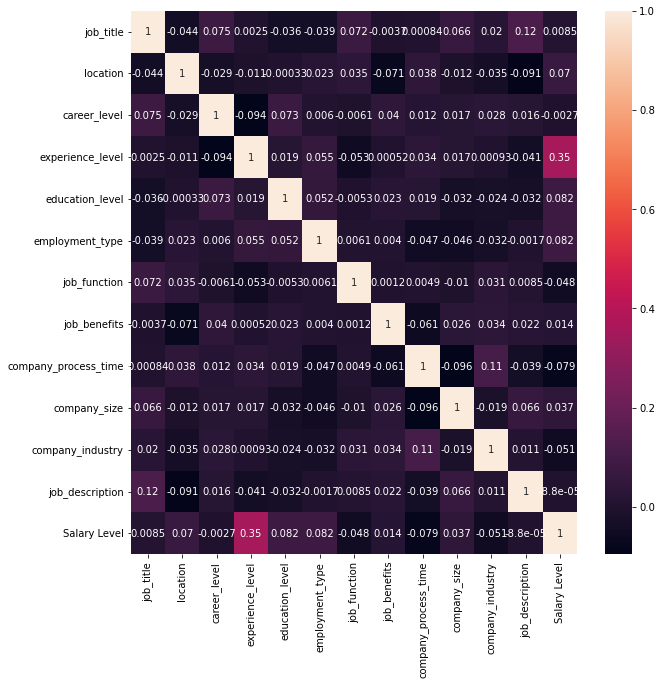

In [100]:
#finding the correlation using heat map
ax,fig = plt.subplots(figsize=(10,10))
data = salarydf_copy2.corr()
sns.heatmap(data, annot=True)
plt.show()

__Explanation__:

The correlation between `Salary Level` and `job_title`, `job_benefits`, and `job_description` are very low so we will remove those 3 variables. We decided not to remove `career_level`, because we want to compare the `Salary Level` based on `career_level` as well.

In [101]:
#Drop variables : job_title, job_benefits, job_description
salarydf_copy2 = salarydf_copy2.drop(['job_title', 'job_benefits', 'job_description', 'company_size'], axis = 1)

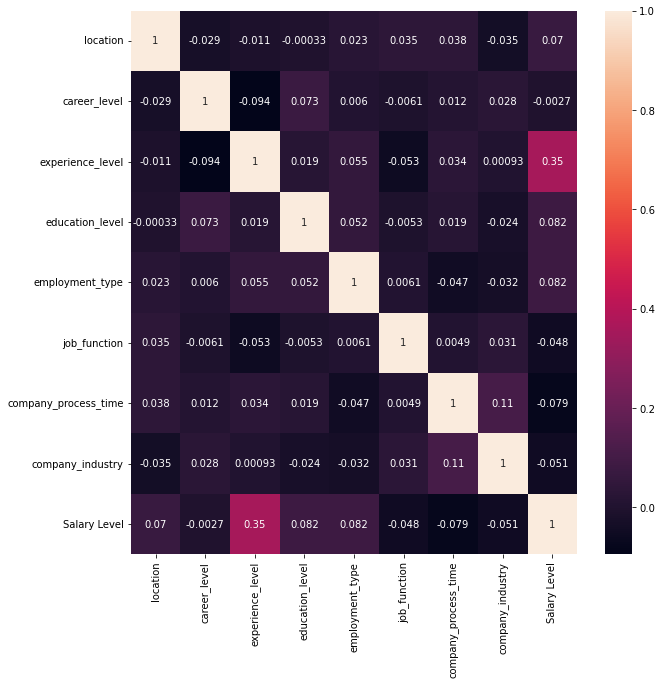

In [102]:
#finding the correlation using heat map
ax,fig = plt.subplots(figsize=(10,10))
data = salarydf_copy2.corr()
sns.heatmap(data, annot=True)
plt.show()

__Explanation__:
- It is a good thing that the correlation between independent variables are not high.
- The correlation between the independent variables and the dependent variable is not too high either, but most has relatively higher value than other correlations between 2 independent variables.
- The weak correlation between independent variables and dependent variable might have happened because we did some imputation to the missing values in some independent variables using mode value, and the imputation is not the actual value of the records. It is only a value from our assumption so we can continue our process without reducing more records.

### Split data

In [103]:
x = salarydf_copy2.drop(['Salary Level'], axis = 1)
y = salarydf_copy2['Salary Level']

__Explanation__:

We're putting the independent variables in x and the dependent variable (that has been categorized) in y.

### Standard Scaler

In [104]:
st = StandardScaler()
st.fit_transform(x)

#split data into train, test, and validation set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, shuffle = True, random_state = 42)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.25, shuffle = True, random_state = 42)

# see train, test, and validation set shape
print("x_train:", x_train.shape)
print("y_train:", y_train.shape)

print("x_test:", x_test.shape)
print("y_test:", y_test.shape)

print("x_val:", x_val.shape)
print("y_val:", y_val.shape)

x_train: (5605, 8)
y_train: (5605,)
x_test: (1869, 8)
y_test: (1869,)
x_val: (1869, 8)
y_val: (1869,)


__Explanation__:

We scaled our independent variables, so that the range of all variables are similar (not to large and not too narrow). Also, we use Standard Scaler for our scaling method so it would not be easily affected by outliers.

The purpose of this process is to make it easier for classifiers in producing a good model.

In [105]:
x_train.head()

,location,career_level,experience_level,education_level,employment_type,job_function,company_process_time,company_industry
33025,8,2,3,18,4,37,29,3
32866,4,3,1,15,4,19,29,30
25442,8,3,2,8,0,41,29,30
17921,7,3,1,9,4,37,23,41
23481,4,3,1,13,0,19,25,18


### Balancing Classes

In [106]:
# See proportion of salary level
y_train.value_counts()

1    2498
2    2465
0     642
Name: Salary Level, dtype: int64

__Explanation__:

The classes in our target variable are imbalanced, because the class 'Sedang' and 'Tinggi' have similar number of records, but class 'Rendah' only has around 600 records, which is way fewer than the other 2 classes. Therefore, we will balance the classes using SMOTE technique, so the classifiers can generate a better model.

In [107]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x_train, y_train = smote.fit_resample(x_train, y_train)

y_train.value_counts()

2    2498
1    2498
0    2498
Name: Salary Level, dtype: int64

__Explanation:__

After using SMOTE, all 3 classes become balanced because they have the same number of record.

## **MODELING BEFORE TUNING**

### Individual Classifier

**1. Logistic Regression Model**

In [108]:
ls = LogisticRegression(multi_class = 'multinomial')
lrModel = ls.fit(x_train, y_train)
lrPred = ls.predict(x_val)
print(classification_report(y_val, lrPred))

              precision    recall  f1-score   support

           0       0.21      0.60      0.32       209
           1       0.50      0.37      0.43       851
           2       0.64      0.52      0.58       809

    accuracy                           0.46      1869
   macro avg       0.45      0.50      0.44      1869
weighted avg       0.53      0.46      0.48      1869



__Explanation__:

The logistic regression model comes out with the accuracy of 44%, we use multinomial classifier as it gives higher accuracy than OVR and OVO classifier.

**2. KNN**

In [109]:
knn = KNeighborsClassifier()
knnModel = knn.fit(x_train, y_train)
knnPred = knn.predict(x_val)
print(classification_report(y_val, knnPred))

              precision    recall  f1-score   support

           0       0.29      0.66      0.40       209
           1       0.63      0.51      0.57       851
           2       0.71      0.61      0.66       809

    accuracy                           0.57      1869
   macro avg       0.54      0.59      0.54      1869
weighted avg       0.63      0.57      0.59      1869



__Explanation__:

By using the K-Nearest Neighbor (KNN) method, the model accuracy results are 55%. This means that there is an increase in accuracy compared to the Logistic Regression method.

**3. Decision Tree**

In [110]:
dt = DecisionTreeClassifier(random_state = 42)
dtModel = dt.fit(x_train, y_train)
dtPred = dt.predict(x_val)
print(classification_report(y_val, dtPred))

              precision    recall  f1-score   support

           0       0.46      0.58      0.51       209
           1       0.69      0.68      0.68       851
           2       0.79      0.75      0.77       809

    accuracy                           0.70      1869
   macro avg       0.65      0.67      0.65      1869
weighted avg       0.71      0.70      0.70      1869



__Explanation__:

The accuracy we got from the decision tree model is 66%. We can see that this model has better accuracy than the last 2 models. Later, we will tune the model with some parameters that might help and improve the accuracy of our decision tree model.

__Individual Classifier__
> Out of all 4 classifiers, classifier with the highest accuracy is **Decision Tree** based on the from f1-score, which is **66%**.

**4. Support Vector Machine**

In [111]:
svm = SVC(random_state = 42)
svmModel = svm.fit(x_train, y_train)
svmPred = svm.predict(x_val)
print(classification_report(y_val, svmPred))

              precision    recall  f1-score   support

           0       0.20      0.55      0.29       209
           1       0.51      0.41      0.46       851
           2       0.69      0.52      0.59       809

    accuracy                           0.47      1869
   macro avg       0.47      0.49      0.45      1869
weighted avg       0.56      0.47      0.50      1869



__Explanation__:

The Support Vector Machine (SVM) method produces a model accuracy of 45%, which is similar to the Logistic Regression method. However, we can see that the accuracy of the SVM model is lower than the Decision Tree model.

### Ensemble Method

**1. Voting Classifier**

In [112]:
#create a dictionary of our models
estimators = [('svm', svm), ('KNN', knn), ('DecisionTree', dt)]
#create our voting classifier, inputting our models
ensemble_vc = VotingClassifier(estimators, voting='hard')

#fit model to training data
ensembleModel = ensemble_vc.fit(x_train, y_train)
ensemblePred = ensemble_vc.predict(x_val)
print(classification_report(y_val, ensemblePred))

              precision    recall  f1-score   support

           0       0.28      0.66      0.39       209
           1       0.68      0.57      0.62       851
           2       0.81      0.66      0.73       809

    accuracy                           0.62      1869
   macro avg       0.59      0.63      0.58      1869
weighted avg       0.69      0.62      0.64      1869



__Explanation__:

We use the combination of SVM, KNN, and Decision Tree classifiers as these classifiers are low in bias and high in variance, therefore we can get a lower variance with this combination. With this model we got the accuracy of 58%, which is lower than expected. But we can improve the accuracy after we tune all of the classifiers that we use here.

**2. Bagging Classifier**

In [113]:
bagg = BaggingClassifier(base_estimator = dt, n_estimators = 100, random_state = 42)
baggModel = bagg.fit(x_train, y_train)
baggPred = bagg.predict(x_val)
print(classification_report(y_val, baggPred))

              precision    recall  f1-score   support

           0       0.54      0.60      0.57       209
           1       0.74      0.74      0.74       851
           2       0.83      0.81      0.82       809

    accuracy                           0.75      1869
   macro avg       0.70      0.72      0.71      1869
weighted avg       0.76      0.75      0.75      1869



__Explanation__:

In the Bagging Classifier method, we use a Decision Tree as a base estimator. This is because in the individual classifier, the Decision Tree method produces the highest model accuracy. By using this model, we get a fairly high accuracy of 71%. However, we will try to increase the accuracy value by tuning the parameters.

**3. Random Forest**


**max_dept** : The maximum splits for all trees in the forest.

**bootstrap** : An indicator of whether or not we want to use bootstrap samples when building trees.

**max_features**: The maximum number of features taht will be used in node splitting.

**criterion** : this is the metric used to asses the stopping criteria for the decision trees.

In [114]:
fit_rf = RandomForestClassifier(random_state = 42)
rfModel = fit_rf.fit(x_train, y_train)
rfPred = fit_rf.predict(x_val)
print(classification_report(y_val, rfPred))

              precision    recall  f1-score   support

           0       0.56      0.59      0.58       209
           1       0.74      0.73      0.74       851
           2       0.82      0.82      0.82       809

    accuracy                           0.75      1869
   macro avg       0.71      0.71      0.71      1869
weighted avg       0.76      0.75      0.76      1869



__Explanation__:

Random forest is basically a combination that consists of some decision trees. In the individual classifier decision tree gave the highest accuracy out of all classifiers, therefore by combining some random forest we might get a higher accuracy than just a decision tree. This is prooved by the result we got. The random forest model has the accuracy of 71%. We might be able to improve the accuracy, later after tuning some parameters for the model.

**4. Boosting Classifier**

In [115]:
adaBoost = AdaBoostClassifier(base_estimator = dt, random_state = 42)
abModel = adaBoost.fit(x_train, y_train)
abPred = adaBoost.predict(x_val)
print(classification_report(y_val, abPred))

              precision    recall  f1-score   support

           0       0.56      0.54      0.55       209
           1       0.71      0.73      0.72       851
           2       0.80      0.78      0.79       809

    accuracy                           0.73      1869
   macro avg       0.69      0.69      0.69      1869
weighted avg       0.73      0.73      0.73      1869



__Explanation__:

In the boosting classifier method, we also utilize the Decision Tree, which has the highest accuracy in the individual classifier, as a base estimator. We get an accuracy that is not much different from the previous 2 methods, which is 69%. However, we will be tuning the parameters to improve the accuracy of the model.

__Ensemble Method__
> Out of all 4 classifiers, classifier with the highest accuracy is Bagging Classifier and Random Forest based on the from f1-score, which is 71%.

## **MODELING AFTER TUNING**

### Individual Classifier

**1. Logistic Regression Model**

In [116]:
ls = LogisticRegression(multi_class = 'multinomial')
param_grid = {'penalty' : ['l1', 'l2', 'elasticnet', None],
              'C' : [0.01, 0.1, 1, 10, 100],
              'solver' : ['newton-cg','sag','liblinear','lbfgs', 'saga']}
lr_grid = GridSearchCV(ls, param_grid = param_grid, cv = 10, n_jobs=3)
lrModel = lr_grid.fit(x_train, y_train)
lrPred = lr_grid.predict(x_val)
print(classification_report(y_val, lrPred))

              precision    recall  f1-score   support

           0       0.21      0.59      0.31       209
           1       0.51      0.38      0.44       851
           2       0.64      0.52      0.57       809

    accuracy                           0.46      1869
   macro avg       0.45      0.50      0.44      1869
weighted avg       0.53      0.46      0.48      1869



We choose 'multinomial' as the LogisticRegression method, because it gives higher accuracy than OVR and OVO method.

**2. KNN**

In [117]:
k_range = list(range(1, 20))
weight_options = ['uniform', 'distance']
param_grid = dict(n_neighbors=k_range, weights=weight_options)
knn = KNeighborsClassifier()
knn_grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False)

knnModel = knn_grid.fit(x_train, y_train)
knnPred = knn_grid.predict(x_val)
print(classification_report(y_val, knnPred))

              precision    recall  f1-score   support

           0       0.39      0.56      0.46       209
           1       0.65      0.65      0.65       851
           2       0.74      0.66      0.70       809

    accuracy                           0.64      1869
   macro avg       0.59      0.62      0.60      1869
weighted avg       0.66      0.64      0.65      1869



**3. Decision Tree**

In [118]:
dt = DecisionTreeClassifier(random_state = 42)
params = {'max_depth': [10,100,1000],
          'max_features': ['auto','sqrt','log2',None],
          'criterion': ['gini','entropy'],
          'max_leaf_nodes': [10,100,1000], 
          'min_samples_split': [2, 3, 4]}
grid_dt = GridSearchCV(dt, params, verbose = 1, cv = 10, n_jobs = 3)
dtModel = grid_dt.fit(x_train, y_train)
dtPred = grid_dt.predict(x_val)
print(classification_report(y_val, dtPred))

Fitting 10 folds for each of 216 candidates, totalling 2160 fits
              precision    recall  f1-score   support

           0       0.46      0.60      0.52       209
           1       0.71      0.70      0.70       851
           2       0.82      0.77      0.79       809

    accuracy                           0.72      1869
   macro avg       0.66      0.69      0.67      1869
weighted avg       0.73      0.72      0.72      1869



**4. Support Vector Machine**

In [119]:
svm = SVC(random_state = 42)

param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
svm_grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

svmModel = svm_grid.fit(x_train, y_train)
svmPred = svm_grid.predict(x_val)
print(classification_report(y_val, svmPred))

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.476 total time=  13.5s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.490 total time=  13.8s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.445 total time=  13.9s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.462 total time=  14.2s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.481 total time=  13.6s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.560 total time=   8.7s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.567 total time=   9.2s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.557 total time=   9.2s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.597 total time=   7.4s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.545 total time=   7.1s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.527 total time=   8.1s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.653 total time=  12.1s
[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.665 total time=  11.6s
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.640 total time=  11.5s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.654 total time=  11.9s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.761 total time=   8.1s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.784 total time=   8.6s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.774 total time=   8.6s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.775 total time=   8.7s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.775 total time=   8.2s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.722 total time=  12.2s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.765 total time=  12.6s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.766 total time=  11.2s
[CV 4/5] END ....C=1000, gam

***Explanation***:

Out of all 4 classifiers, classifier with the highest accuracy is Decision Tree based on the **macro avg** from f1-score, which is **67%**. This is probably because Decision tree works well in a structured data with limited amount of records and when most features are non-monotonic, which is exactly like our dataset's current condition.

We use macro average because we have imbalanced validation set, and we want to treat all classes (high, medium, and low) equally important. It is important for us to measure the accuracy of our model's prediction not only for high-paying jobs, but also for medium and low-paying jobs. We will try to improve the accuracy (macro avg) by using ensemble method.

### Ensemble Method

**1. Voting Classifier**

In [120]:
#create a dictionary of our models
estimators = [('svm', svm), ('KNN', knn), ('DecisionTree', dt)]
#create our voting classifier, inputting our models
ensemble_vc = VotingClassifier(estimators, voting='hard')

#fit model to training data
params = {'voting': ['hard', 'soft'], 
          'weights': [(1,1,1), (2,1,1), (1,2,1), (1,1,2)]}
grid_vote = GridSearchCV(ensemble_vc, params)

ensembleModel = grid_vote.fit(x_train, y_train)
ensemblePred = grid_vote.predict(x_val)
print(classification_report(y_val, ensemblePred))

              precision    recall  f1-score   support

           0       0.35      0.65      0.45       209
           1       0.65      0.64      0.64       851
           2       0.82      0.66      0.73       809

    accuracy                           0.65      1869
   macro avg       0.61      0.65      0.61      1869
weighted avg       0.69      0.65      0.66      1869



For Voting Classifier, we use the combination of SVM, KNN, and DecisionTree classifiers because those classifiers are low in bias and high in variance. So we combine those classifiers to lower the variance.

**2. Bagging Classifier**

In [121]:
bagg = BaggingClassifier(base_estimator = dt, n_estimators = 100, random_state = 42)
param_dist = {'base_estimator__max_depth': [10,100,1000],
              'base_estimator__max_features': ['auto','sqrt','log2',None],
              'base_estimator__criterion': ['gini','entropy'],
              'base_estimator__max_leaf_nodes': [10,100,1000], 
              'base_estimator__min_samples_split': [2, 3, 4],
              'bootstrap': [True, False]}

grid_bagg = GridSearchCV(bagg, cv = 10, param_grid = param_dist, n_jobs=3)
baggModel = grid_bagg.fit(x_train, y_train)
#Calculate the score
baggPred = grid_bagg.predict(x_val)
print(classification_report(y_val, baggPred))

              precision    recall  f1-score   support

           0       0.56      0.63      0.59       209
           1       0.75      0.72      0.73       851
           2       0.82      0.83      0.83       809

    accuracy                           0.76      1869
   macro avg       0.71      0.73      0.72      1869
weighted avg       0.76      0.76      0.76      1869



**3. Random Forest**


**max_dept** : The maximum splits for all trees in the forest.

**bootstrap** : An indicator of whether or not we want to use bootstrap samples when building trees.

**max_features**: The maximum number of features taht will be used in node splitting.

**criterion** : this is the metric used to asses the stopping criteria for the decision trees.

In [122]:
param_dist = {'max_depth': [10,100,1000],
              'max_features': ['auto','sqrt','log2',None],
              'criterion': ['gini','entropy'],
              'max_leaf_nodes': [10,100,1000], 
              'min_samples_split': [2, 3, 4],
              'bootstrap': [True, False]}

fit_rf = RandomForestClassifier(random_state = 42)
grid_rf = GridSearchCV(fit_rf, cv = 10, param_grid = param_dist, n_jobs=3)

rfModel = grid_rf.fit(x_train, y_train)
print('Best Parameter:', grid_rf.best_params_)

Best Parameter: {'bootstrap': False, 'criterion': 'gini', 'max_depth': 100, 'max_features': 'auto', 'max_leaf_nodes': 1000, 'min_samples_split': 2}


In [123]:
rfPred = grid_rf.predict(x_val)
print(classification_report(y_val, rfPred))

              precision    recall  f1-score   support

           0       0.56      0.62      0.59       209
           1       0.76      0.72      0.74       851
           2       0.82      0.84      0.83       809

    accuracy                           0.76      1869
   macro avg       0.71      0.72      0.72      1869
weighted avg       0.76      0.76      0.76      1869



**4. Boosting Classifier**

In [124]:
adaBoost = AdaBoostClassifier(base_estimator = dt, random_state = 42)
param_dist = {'base_estimator__max_depth': [10,100,1000],
              'base_estimator__max_features': ['auto','sqrt','log2',None],
              'base_estimator__criterion': ['gini','entropy'],
              'base_estimator__max_leaf_nodes': [10,100,1000], 
              'base_estimator__min_samples_split': [2, 3, 4]}
grid_ab = GridSearchCV(adaBoost, cv = 10, param_grid = param_dist, n_jobs=3)

abModel = grid_ab.fit(x_train, y_train)
abPred = grid_ab.predict(x_val)
print(classification_report(y_val, abPred))

              precision    recall  f1-score   support

           0       0.63      0.54      0.58       209
           1       0.71      0.78      0.74       851
           2       0.82      0.77      0.80       809

    accuracy                           0.75      1869
   macro avg       0.72      0.70      0.71      1869
weighted avg       0.75      0.75      0.75      1869



Out of all 4 ensemble methods, classifiers with the highest accuracy is Random Forest and Bagging Classifier based on the **macro avg** from f1-score, which is **72%**. This is because from the Individual Classifiers, Decision Tree gives the best performance. Random Forest and Bagging Classifier combine multiple Decision Tree, which may have caused the model's accuracy to be higher than only use one Decision Tree and combine it with another individual classifiers that have less accuracy.

Both Random Forest and Bagging Classifier give the highest accuracy. However, in our opinion, random forest is better than bagging because the splitting process to create each decision tree does not consider all features available (unlike bagging who does so for each splitting), rather each splitting process uses different subset of features (selecting only some features randomly) so each tree will be different to one another. Therefore, the variance of the trees that have been created can be averaged and the model will have lower bias rate. We decided to use random forest as the best classifier which will be applied for predicting the testing set.

## **Evaluation for Random Forest (Highest Accuracy)**

In [125]:
from sklearn.metrics import confusion_matrix

rfPred = grid_rf.predict(x_val)
cp = confusion_matrix(y_val, rfPred)
cp_df = pd.DataFrame(cp, index = ['Rendah','Sedang','Tinggi'], columns = ['Rendah','Sedang','Tinggi'])

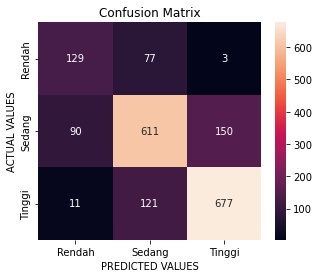

In [126]:
plt.figure(figsize=(5,4))
sns.heatmap(cp_df, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.ylabel('ACTUAL VALUES')
plt.xlabel('PREDICTED VALUES')
plt.show()

Based on the Random Forest's Confusion Matrix:

- Actual class 'Tinggi' which is correctly predicted by our model is 678 records, with 121 records being wrongly predicted as class 'Sedang' and 10 records being wrongly predicted as class 'Rendah'.
- Actual class 'Sedang' which is correctly predicted by our model is 616 records, with 139 records being wrongly predicted as class 'Tinggi' and 96 records being wrongly predicted as class 'Rendah'.
- Actual class 'Rendah' which is correctly predicted by our model is 130, and with 3 records being wrongly predicted as class 'Tinggi' and 76 records being wrongly predicted as class 'Sedang'.

This means that **our model works well when predicting class 'Tinggi' and 'Sedang', and works fairly good when predicting class 'Rendah'** because around 38% of records with actual class 'Rendah' are missclassified as either class 'Tinggi' or 'Sedang'. This is because we have imbalanced classes in our training set, where we have many records with class 'Tinggi' and 'Sedang' (more than 2500 records), but only have few records with class 'Rendah' (less than 700 records). So we balance it up using SMOTE technique instead of using actual data.


Based on the Random Forest's Classification Report:

- **Our model's accuracy is quite high based on the Accuracy Score, which is 72%**.
- Model seems to work really well when predicting class 'Tinggi', because the f1-score of class 'Tinggi' (0.83) is higher than f1-score in class 'Sedang' and 'Rendah'.
- Model works quite decently when predicting class 'Rendah', but still a bit poorer than other classes because the f1-score of class 'Rendah' (0.58) is lower than f1-score in class 'Sedang' and 'Tinggi'.

In [127]:
rfPred = grid_bagg.predict(x_val)
cp = confusion_matrix(y_val, rfPred)
cp_df = pd.DataFrame(cp, index = ['Rendah','Sedang','Tinggi'], columns = ['Rendah','Sedang','Tinggi'])

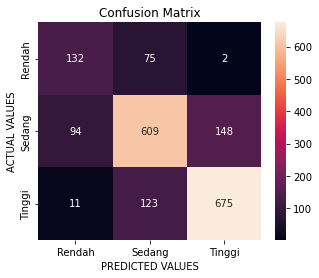

In [128]:
plt.figure(figsize=(5,4))
sns.heatmap(cp_df, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.ylabel('ACTUAL VALUES')
plt.xlabel('PREDICTED VALUES')
plt.show()

## **CONCLUSION**

### Predict Testing Set with Random Forest Model

In [129]:
rfPred2 = grid_rf.predict(x_test)
print(rfPred2)

[2 2 1 ... 1 0 1]


### Use Un-encoded Data

In [130]:
x2 = salarydf_copy.drop(['salary', 'Salary Level'], axis = 1)
y2 = salarydf_copy['Salary Level']

In [131]:
x_train, x_test, y_train, y_test = train_test_split(x2, y2, test_size = 0.20, shuffle = True, random_state = 42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.25, shuffle = True, random_state = 42)
x_test.head()

,job_title,location,career_level,experience_level,education_level,employment_type,job_function,job_benefits,company_process_time,company_size,company_industry,job_description
22332,WORKFORCE MANAGEMENT (WFM),Jawa Tengah,Pegawai (non-manajemen & non-supervisor),1,"Sertifikat Professional, D3 (Diploma), D4 (Dip...",Penuh Waktu,"Pelayanan,Layanan Pelanggan","Asuransi kesehatan;Waktu regular, Senin - Juma...",17,201 - 500 pekerja,Manajemen/Konsulting HR,PT MITRACOMM EKASARANA bekerjasama dengan Perb...
4267,Manager PPIC,DKI Jakarta,Manajer/Asisten Manajer,5,Tidak terspesifikasi,Penuh Waktu,"Teknik,Mekanikal","BPJS;uniform;Senin-Jumat, Sabtu(optional)",29,201 - 500 pekerja,Pameran/Manajemen acara/PIKP,Pendidikan min S1Max usia 45 tahunPengalaman d...
17390,BANCASSURANCE SPECIALIST - PADANG,Riau,Lulusan baru/Pengalaman kerja kurang dari 1 tahun,1,"Sertifikat Professional, D3 (Diploma), D4 (Dip...",Penuh Waktu,"Penjualan / Pemasaran,Penjualan - Jasa Keuangan",Tunjangan Pendidikan;Tip;Asuransi kesehatan;Ol...,7,2001 - 5000 pekerja,Asuransi,BANCASSURANCE SPECIALIST (BAS)Representative B...
13561,MARKETING,Jawa Timur,Pegawai (non-manajemen & non-supervisor),1,"Sertifikat Professional, D3 (Diploma), D4 (Dip...",Penuh Waktu,"Penjualan / Pemasaran,Telesales/Telemarketing",Tip;Asuransi kesehatan;Parkir;Formil (contoh: ...,27,51 - 200 pekerja,Industri Berat/Mesin/Peralatan,Kualifikasi:Pengalaman di bidang Marketing dan...
22614,HR Recruitment,DKI Jakarta,Pegawai (non-manajemen & non-supervisor),1,Sarjana (S1),Kontrak,"Sumber Daya Manusia/Personalia,Sumber Daya Man...",Asuransi Gigi;Tip;Asuransi kesehatan;Olahraga ...,28,2001 - 5000 pekerja,Telekomunikasi,KUALIFIKASIUsia max. 35 tahunPengalaman minima...


In [132]:
salarydf2 = x_test.copy(deep = True)
salarydf2['Salary Level'] = rfPred2
salarydf2.head()

,job_title,location,career_level,experience_level,education_level,employment_type,job_function,job_benefits,company_process_time,company_size,company_industry,job_description,Salary Level
22332,WORKFORCE MANAGEMENT (WFM),Jawa Tengah,Pegawai (non-manajemen & non-supervisor),1,"Sertifikat Professional, D3 (Diploma), D4 (Dip...",Penuh Waktu,"Pelayanan,Layanan Pelanggan","Asuransi kesehatan;Waktu regular, Senin - Juma...",17,201 - 500 pekerja,Manajemen/Konsulting HR,PT MITRACOMM EKASARANA bekerjasama dengan Perb...,2
4267,Manager PPIC,DKI Jakarta,Manajer/Asisten Manajer,5,Tidak terspesifikasi,Penuh Waktu,"Teknik,Mekanikal","BPJS;uniform;Senin-Jumat, Sabtu(optional)",29,201 - 500 pekerja,Pameran/Manajemen acara/PIKP,Pendidikan min S1Max usia 45 tahunPengalaman d...,2
17390,BANCASSURANCE SPECIALIST - PADANG,Riau,Lulusan baru/Pengalaman kerja kurang dari 1 tahun,1,"Sertifikat Professional, D3 (Diploma), D4 (Dip...",Penuh Waktu,"Penjualan / Pemasaran,Penjualan - Jasa Keuangan",Tunjangan Pendidikan;Tip;Asuransi kesehatan;Ol...,7,2001 - 5000 pekerja,Asuransi,BANCASSURANCE SPECIALIST (BAS)Representative B...,1
13561,MARKETING,Jawa Timur,Pegawai (non-manajemen & non-supervisor),1,"Sertifikat Professional, D3 (Diploma), D4 (Dip...",Penuh Waktu,"Penjualan / Pemasaran,Telesales/Telemarketing",Tip;Asuransi kesehatan;Parkir;Formil (contoh: ...,27,51 - 200 pekerja,Industri Berat/Mesin/Peralatan,Kualifikasi:Pengalaman di bidang Marketing dan...,1
22614,HR Recruitment,DKI Jakarta,Pegawai (non-manajemen & non-supervisor),1,Sarjana (S1),Kontrak,"Sumber Daya Manusia/Personalia,Sumber Daya Man...",Asuransi Gigi;Tip;Asuransi kesehatan;Olahraga ...,28,2001 - 5000 pekerja,Telekomunikasi,KUALIFIKASIUsia max. 35 tahunPengalaman minima...,0


### Display The Average Salary Levels based on Location, Career Level, and Job Function

In [133]:
salarydf2 = salarydf2[['location','career_level', 'job_function', 'Salary Level']]

In [134]:
for x in salarydf2.index :
    if (salarydf2['Salary Level'][x]) == 0 : 
      salarydf2['Salary Level'][x] = 'Rendah'
    elif (salarydf2['Salary Level'][x] == 1) :
      salarydf2['Salary Level'][x] = 'Sedang'
    elif (salarydf2['Salary Level'][x] == 2) :
      salarydf2['Salary Level'][x] = 'Tinggi'

In [135]:
salarydf2.head()

,location,career_level,job_function,Salary Level
22332,Jawa Tengah,Pegawai (non-manajemen & non-supervisor),"Pelayanan,Layanan Pelanggan",Tinggi
4267,DKI Jakarta,Manajer/Asisten Manajer,"Teknik,Mekanikal",Tinggi
17390,Riau,Lulusan baru/Pengalaman kerja kurang dari 1 tahun,"Penjualan / Pemasaran,Penjualan - Jasa Keuangan",Sedang
13561,Jawa Timur,Pegawai (non-manajemen & non-supervisor),"Penjualan / Pemasaran,Telesales/Telemarketing",Sedang
22614,DKI Jakarta,Pegawai (non-manajemen & non-supervisor),"Sumber Daya Manusia/Personalia,Sumber Daya Man...",Rendah


In [136]:
salarydf2['Salary Level'] = salarydf2['Salary Level'].astype('object')

In [137]:
salarydf2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1869 entries, 22332 to 33262
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   location      1869 non-null   object
 1   career_level  1869 non-null   object
 2   job_function  1869 non-null   object
 3   Salary Level  1869 non-null   object
dtypes: object(4)
memory usage: 137.5+ KB


In [138]:
result = salarydf2.groupby(['job_function','career_level','location' ]).agg(pd.Series.mode)
result

Salary Level
job_function                                     career_level                                      location                     
Akuntansi / Keuangan,Akuntansi Umum / Pembiayaan CEO/GM/Direktur/Manajer Senior                    Jawa Barat             Tinggi
                                                                                                   NAD                    Tinggi
                                                 Lulusan baru/Pengalaman kerja kurang dari 1 tahun DKI Jakarta            Sedang
                                                 Manajer/Asisten Manajer                           Banten                 Tinggi
                                                                                                   DIY                    Tinggi
...                                                                                                                          ...
Teknik,Teknik Lingkungan                         Pegawai (non-manajemen & non-supervisor)          Jawa Barat             Sedang
                                                                                                   Jawa Timur             Tinggi
                                                                                                   Kalimantan Timur       Tinggi
                                                                                                   NTB                    Tinggi
                                                 Supervisor/Koordinator                            DKI Jakarta            Sedang

[645 rows x 1 columns]

### Decide top 5 most popular jobs

In [139]:
salarydf2['job_function'].value_counts().head(10)

Penjualan / Pemasaran,Penjualan Ritel                      196
Komputer/Teknologi Informasi,IT-Perangkat Lunak            178
Akuntansi / Keuangan,Akuntansi Umum / Pembiayaan           144
Penjualan / Pemasaran,Pemasaran/Pengembangan Bisnis        110
Sumber Daya Manusia/Personalia,Sumber Daya Manusia / HR     88
Sumber Daya Manusia/Personalia,Staf / Administrasi umum     73
Penjualan / Pemasaran,Digital Marketing                     69
Penjualan / Pemasaran,Penjualan - Korporasi                 61
Hotel/Restoran,Makanan/Minuman/Pelayanan Restoran           61
Seni/Media/Komunikasi,Seni / Desain Kreatif                 59
Name: job_function, dtype: int64

**Top 5 Most Popular Jobs based on the job function that appear most often on this dataset**

1. Penjualan / Pemasaran,Penjualan Ritel                      

2. Komputer/Teknologi Informasi,IT-Perangkat Lunak          

3. Akuntansi / Keuangan,Akuntansi Umum / Pembiayaan 

4. Penjualan / Pemasaran,Pemasaran/Pengembangan Bisnis   

5. Sumber Daya Manusia/Personalia,Sumber Daya Manusia / HR     

### Gain Insight from Top 5 Most Popular Jobs

#### 1. Penjualan / Pemasaran,Penjualan Ritel

In [140]:
top1 = salarydf2[(salarydf2['job_function'] == 'Penjualan / Pemasaran,Penjualan Ritel')]
top1.groupby(['job_function','career_level','location' ]).agg(pd.Series.mode)

Salary Level
job_function                          career_level                                      location                                   
Penjualan / Pemasaran,Penjualan Ritel CEO/GM/Direktur/Manajer Senior                    DKI Jakarta                          Tinggi
                                                                                        Sulawesi Utara                       Tinggi
                                      Lulusan baru/Pengalaman kerja kurang dari 1 tahun Banten                               Sedang
                                                                                        DKI Jakarta                          Sedang
                                                                                        Jawa Barat                 [Sedang, Tinggi]
                                                                                        Jawa Timur                           Tinggi
                                                                                        Kalimantan Selatan                   Rendah
                                                                                        Sumatera Selatan                     Sedang
                                      Manajer/Asisten Manajer                           Bali                                 Tinggi
                                                                                        Banten                               Tinggi
                                                                                        DKI Jakarta                          Tinggi
                                                                                        Jawa Barat                           Tinggi
                                                                                        Jawa Tengah                          Tinggi
                                                                                        Kalimantan Barat                     Tinggi
                                                                                        NTT                                  Tinggi
                                                                                        Riau                                 Tinggi
                                                                                        Sumatera Barat                       Tinggi
                                                                                        Sumatera Selatan                     Tinggi
                                      Pegawai (non-manajemen & non-supervisor)          Bali                                 Sedang
                                                                                        Banten                               Sedang
                                                                                        Bengkulu                             Tinggi
                                                                                        DIY                        [Rendah, Sedang]
                                                                                        DKI Jakarta                          Sedang
                                                                                        Jambi                                Rendah
                                                                                        Jawa Barat                           Tinggi
                                                                                        Jawa Tengah                          Sedang
                                                                                        Jawa Timur                           Tinggi
                                                                                        Kalimantan Barat                     Tinggi
                                                                                        Kalimantan Selatan                   Sedang
                           

__Explanations__:

This job function is the most popular job in our dataset, each career level are available in several provinces. Most of people who have career in this field tend to get average to high income. There are some career level that has low income, but that category is  fresh gaduates, this makes sense as usually they're paid low because of their little experience. But in some province even fresh graduate has average income. As an employee in this field it is mostlikely to get average income, some might get high income and some might get low income like in Jambi. Career level that are higher than employee (superviser/ management) tend to get high income, but some might get average income.

#### 2. Komputer/Teknologi Informasi,IT-Perangkat Lunak

In [141]:
top2 = salarydf2[(salarydf2['job_function'] == 'Komputer/Teknologi Informasi,IT-Perangkat Lunak')]
top2.groupby(['job_function','career_level','location']).agg(pd.Series.mode)

Salary Level
job_function                                    career_level                                      location                                   
Komputer/Teknologi Informasi,IT-Perangkat Lunak CEO/GM/Direktur/Manajer Senior                    DKI Jakarta                          Tinggi
                                                Lulusan baru/Pengalaman kerja kurang dari 1 tahun DIY                                  Tinggi
                                                                                                  DKI Jakarta                          Sedang
                                                                                                  Jawa Timur                           Sedang
                                                Manajer/Asisten Manajer                           Bali                                 Tinggi
                                                                                                  DKI Jakarta                          Tinggi
                                                                                                  Jawa Tengah                          Tinggi
                                                Pegawai (non-manajemen & non-supervisor)          Bali                                 Tinggi
                                                                                                  Banten                     [Sedang, Tinggi]
                                                                                                  DIY                                  Tinggi
                                                                                                  DKI Jakarta                          Sedang
                                                                                                  Jawa Barat                           Tinggi
                                                                                                  Jawa Tengah                          Tinggi
                                                                                                  Jawa Timur                           Tinggi
                                                                                                  Kepulauan Bangka Belitung            Sedang
                                                                                                  Kepulauan Riau                       Sedang
                                                                                                  NAD                                  Tinggi
                                                                                                  Sumatera Utara                       Sedang
                                                Supervisor/Koordinator                            Bali                                 Tinggi
                                                                                                  Banten                               Tinggi
                                                                                                  DKI Jakarta                          Tinggi
                                                                                                  Jawa Barat                           Tinggi
                                                                                                  Jawa Timur                           Tinggi
                                                                                                  NAD                                  Tinggi
                                                                                                  Sumatera Utara                       Tinggi

__Explanation__:

As a popular and high demand field, most of the salaries obtained while working in this field in different locations in Indonesia are classified as high based on the respective UMP. Because DKI Jakarta is the capital city of Indonesia, it has higher UMP than other province therefore it is possible for low/average salary employees in DKI Jakarta might has the same salary as the high income employees who works in other location. Most of the average income career level are fresh graduates, but considering the lack of experience, average income is actually considered high for them. Regardless of the career level, income from working in the IT field is more likely above than average.

#### 3. Akuntansi / Keuangan,Akuntansi Umum / Pembiayaan

In [142]:
top3 = salarydf2[(salarydf2['job_function'] == 'Akuntansi / Keuangan,Akuntansi Umum / Pembiayaan')]
top3.groupby(['job_function','career_level','location']).agg(pd.Series.mode)

Salary Level
job_function                                     career_level                                      location                              
Akuntansi / Keuangan,Akuntansi Umum / Pembiayaan CEO/GM/Direktur/Manajer Senior                    Jawa Barat                      Tinggi
                                                                                                   NAD                             Tinggi
                                                 Lulusan baru/Pengalaman kerja kurang dari 1 tahun DKI Jakarta                     Sedang
                                                 Manajer/Asisten Manajer                           Banten                          Tinggi
                                                                                                   DIY                             Tinggi
                                                                                                   DKI Jakarta                     Tinggi
                                                                                                   Jawa Barat                      Tinggi
                                                                                                   Jawa Tengah                     Tinggi
                                                                                                   Kalimantan Tengah               Tinggi
                                                                                                   Sulawesi Selatan                Tinggi
                                                 Pegawai (non-manajemen & non-supervisor)          Bali                            Tinggi
                                                                                                   Banten                          Tinggi
                                                                                                   DIY                             Sedang
                                                                                                   DKI Jakarta                     Sedang
                                                                                                   Jawa Barat                      Tinggi
                                                                                                   Jawa Timur                      Tinggi
                                                                                                   Kalimantan Barat                Tinggi
                                                                                                   Kalimantan Utara                Sedang
                                                                                                   Sulawesi Tengah                 Tinggi
                                                                                                   Sumatera Utara                  Tinggi
                                                 Supervisor/Koordinator                            Banten                          Tinggi
                                                                                                   DIY                             Sedang
                                                                                                   DKI Jakarta                     Sedang
                                                                                                   Jawa Barat                      Tinggi
                                                                                                   Jawa Tengah                     Sedang
                                                                                                   Jawa Timur                      Tinggi
                                                                                                   Kepulauan Bangka Belitung       Tinggi
                                                                                                   NAD                     

__Explanation__:

In this job field, most salaries level in different locations in Indonesia are either medium or high, except for salary level for fresh graduate accountant, which is low. This is understandable because most fresh graduates don't have any work experience, so usually the majority of companies tend to give salary equivalent to minimum wage. 

Overall, a job field in accountant is a good career choice as it doesn't have any low salary level in any location, regardless of the career level. This is probably because accounting companies still have a rapid growth in Indonesia, and it requires people with good mathematics, finance, and business skill. Also, accounting field is still the third most in-demand job after IT and sales based on JobStreet.

#### 4. Penjualan / Pemasaran,Pemasaran/Pengembangan Bisnis

In [143]:
top4 = salarydf2[(salarydf2['job_function'] == 'Penjualan / Pemasaran,Pemasaran/Pengembangan Bisnis')]
top4.groupby(['job_function','career_level','location']).agg(pd.Series.mode)

Salary Level
job_function                                       career_level                                      location                            
Penjualan / Pemasaran,Pemasaran/Pengembangan Bi... CEO/GM/Direktur/Manajer Senior                    Banten                        Tinggi
                                                                                                     DKI Jakarta                   Tinggi
                                                                                                     Sumatera Utara                Tinggi
                                                   Lulusan baru/Pengalaman kerja kurang dari 1 tahun Banten                        Sedang
                                                                                                     DKI Jakarta                   Sedang
                                                                                                     Jawa Tengah                   Sedang
                                                                                                     Sumatera Utara                Sedang
                                                   Manajer/Asisten Manajer                           Bali                          Tinggi
                                                                                                     Banten              [Sedang, Tinggi]
                                                                                                     DKI Jakarta                   Tinggi
                                                                                                     Jawa Barat                    Tinggi
                                                                                                     Jawa Timur                    Tinggi
                                                                                                     Sumatera Utara                Tinggi
                                                   Pegawai (non-manajemen & non-supervisor)          Bali                          Sedang
                                                                                                     Banten                        Tinggi
                                                                                                     DKI Jakarta                   Sedang
                                                                                                     Jawa Barat                    Tinggi
                                                                                                     Jawa Tengah                   Tinggi
                                                                                                     Jawa Timur                    Sedang
                                                                                                     Kalimantan Timur              Sedang
                                                                                                     Papua                         Sedang
                                                                                                     Sumatera Barat                Sedang
                                                                                                     Sumatera Utara                Sedang
                                                   Supervisor/Koordinator                            Bali                          Tinggi
                                                                                                     DKI Jakarta                   Sedang
                                                                                                     Jawa Barat                    Tinggi
                                                                                                     Jawa Tengah                   Tinggi
                                                                                                     Jawa Timur            

__Explanation__:

Pemasaran / Pengembangan Bisnis is one of the most popular jobs with a salary range from 'Sedang' to 'Tinggi'. The position (career level) of 'CEO/GM/Director/Senior Manager', and 'Manager/Assistant Manager' with the highest salary range is 'High'. For 'Lulusan baru/Pengalaman kerja kurang dari 1 tahun' and 'Pegawai', the majority salary range is 'Sedang'. And for the 'Supervisor/Koordinator' has the opportunity to have a 'Sedang' to 'Tinggi' salary level. For DKI Jakarta which has the highest UMP in Indonesia, or for others, this salary range is suitable for Jakarta's living cost. So based on the career level with the job function, it is a great opportunity to get a 'high' salary range

#### 5. Sumber Daya Manusia/Personalia,Sumber Daya Manusia / HR

In [144]:
top5 = salarydf2[(salarydf2['job_function'] == 'Sumber Daya Manusia/Personalia,Sumber Daya Manusia / HR')]
top5.groupby(['job_function','career_level','location']).agg(pd.Series.mode)

Salary Level
job_function                                       career_level                                      location                            
Sumber Daya Manusia/Personalia,Sumber Daya Manu... CEO/GM/Direktur/Manajer Senior                    DKI Jakarta                   Tinggi
                                                                                                     NAD                           Tinggi
                                                   Lulusan baru/Pengalaman kerja kurang dari 1 tahun DKI Jakarta                   Rendah
                                                                                                     Jawa Timur                    Tinggi
                                                                                                     Sulawesi Tengah               Sedang
                                                   Manajer/Asisten Manajer                           Banten                        Tinggi
                                                                                                     DKI Jakarta                   Tinggi
                                                                                                     Jawa Barat                    Tinggi
                                                                                                     Jawa Timur                    Tinggi
                                                   Pegawai (non-manajemen & non-supervisor)          Banten              [Sedang, Tinggi]
                                                                                                     DKI Jakarta                   Sedang
                                                                                                     Jawa Tengah                   Tinggi
                                                                                                     Jawa Timur                    Tinggi
                                                   Supervisor/Koordinator                            Banten                        Tinggi
                                                                                                     DKI Jakarta                   Sedang
                                                                                                     Jawa Barat                    Tinggi
                                                                                                     Jawa Tengah                   Tinggi
                                                                                                     Jawa Timur                    Tinggi
                                                                                                     Kalimantan Selatan            Tinggi

__Explanation__:

Based on the output above, the field of work as 'Sumber Daya Manusia/Personalia,Sumber Daya Manusia / HR' in various locations in Indonesia mostly has a moderate to high salary level according to each location's minimum wage. However, there is also a low salary level in DKI Jakarta province, that is when the employee is a recent graduate or has only less than 1 year of work experience, which makes sense for beginners in any job field. It can be concluded that the field of human resources work is a promising job because it has a good salary level, ranging from moderate to high, which already exceeds each location's minimum wage.

### FINAL CONCLUSION

__CONCLUSION__:

**Top 5 Most Popular Jobs**
1. Penjualan Ritel
2. IT-Perangkat Lunak
3. Akuntansi Umum / Pembiayaan
4. Pemasaran / Pengembangan Bisnis
5. SDM,Personalia / HR  

From the top 5 popular work fields, it is concluded that:
- Mostly they have a salary range (salary level) from 'Medium' to 'High'
- The majority of available job locations are in Java (Especially DKI Jakarta)
- With the most job positions (career level) as 'Employee'

That way, predictions of salary levels are determined based on the UMP of each region with 'Low', 'Medium' & 'High' classifications. This prediction is strongly influenced by the field of work, position, and location of work.

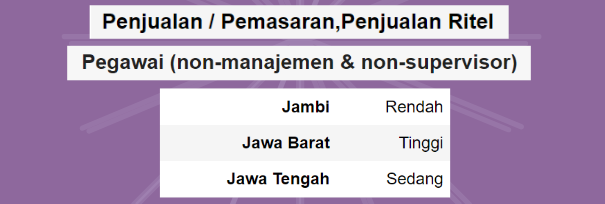

Even though the field of work & position is the same, the work location also affects the salary level you get.

In [145]:
lr_grid.best_params_

{'C': 10, 'penalty': 'l2', 'solver': 'sag'}

In [146]:
knn_grid.best_params_

{'n_neighbors': 2, 'weights': 'distance'}

In [147]:
grid_dt.best_params_

{'criterion': 'gini',
 'max_depth': 100,
 'max_features': None,
 'max_leaf_nodes': 1000,
 'min_samples_split': 3}

In [148]:
svm_grid.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

In [149]:
grid_vote.best_params_

{'voting': 'hard', 'weights': (1, 1, 2)}

In [150]:
grid_bagg.best_params_

{'base_estimator__criterion': 'entropy',
 'base_estimator__max_depth': 100,
 'base_estimator__max_features': 'auto',
 'base_estimator__max_leaf_nodes': 1000,
 'base_estimator__min_samples_split': 3,
 'bootstrap': False}

In [151]:
grid_rf.best_params_

{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': 100,
 'max_features': 'auto',
 'max_leaf_nodes': 1000,
 'min_samples_split': 2}

In [152]:
grid_ab.best_params_

{'base_estimator__criterion': 'gini',
 'base_estimator__max_depth': 100,
 'base_estimator__max_features': 'log2',
 'base_estimator__max_leaf_nodes': 1000,
 'base_estimator__min_samples_split': 4}